# **HW 3: Data Clustering**
<hr>

<u>**Members**</u><br>
Tharnarch Thoranisttakul 63340500025<br>
Athimet Aiewcharoen 63340500068
<hr>

In [49]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.graph_objs import *
%matplotlib inline

import pandas_profiling as pp
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance

# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Fetures selection
from sklearn.feature_selection import SelectKBest, f_classif, chi2,VarianceThreshold
from sklearn.decomposition import PCA

# Models
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering, AffinityPropagation, Birch, MeanShift, OPTICS
from kmodes.kprototypes import KPrototypes
from sklearn.neighbors import NearestNeighbors

# Model selection
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedKFold, StratifiedKFold, cross_val_score

# Resampling
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import InstanceHardnessThreshold, RandomUnderSampler, NearMiss

# Classification metrics
from sklearn.metrics import classification_report, confusion_matrix , silhouette_score , rand_score , adjusted_mutual_info_score, mutual_info_score

# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

# For Hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Make image directory (img)
import os
currDir = os.getcwd()
if not os.path.exists('img'):
    os.mkdir('img')
if not os.path.exists('img/dataexplo'):
    os.mkdir('img/dataexplo')
if not os.path.exists('img/dataprepro'):
    os.mkdir('img/dataprepro')
if not os.path.exists('img/kmeans'):
    os.makedirs('img/kmeans')
if not os.path.exists('img/kprototype'):
    os.makedirs('img/kprototype')
if not os.path.exists('img/fcluster'):
    os.makedirs('img/fcluster')
if not os.path.exists('img/agglo'):
    os.makedirs('img/agglo')
if not os.path.exists('img/dbscan'):
    os.makedirs('img/dbscan')

# Set global random seed
np.random.seed(1)

In [50]:
from matplotlib.colors import ListedColormap
from matplotlib.cm import get_cmap

cmap = ListedColormap([(0.235, 0.635, 0.827), (0.863, 0.863, 0.863)])
pieCmap = get_cmap('plasma')
snsPalette = [(0.235, 0.635, 0.827), (0.475, 0.027, 0.082)]
bgColor = (0.059, 0.067, 0.102)
axBGColor = (0.863, 0.863, 0.863)
barColor = (0.235, 0.635, 0.827)
axTextColor = (0.9, 0.9, 0.9)
textColor = (0, 0, 0)
titleColor = (0.9, 0.9, 0.9)
plt.rcParams['figure.facecolor'] = bgColor
plt.rcParams['axes.facecolor'] = axBGColor
plt.rcParams['axes.edgecolor'] = axTextColor
plt.rcParams['axes.labelcolor'] = axTextColor
plt.rcParams['xtick.color'] = axTextColor
plt.rcParams['ytick.color'] = axTextColor
plt.rcParams['text.color'] = textColor
plt.rcParams['axes.titlecolor'] = titleColor
plt.rcParams['legend.labelcolor'] = titleColor

plotlyGridcolor = 'rgba(0.9, 0.9, 0.9, 0.3)'

## **Data Exploration**

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.


There are a total of 17 features in this dataset which are:

|Feature Name|Description|Data Type|
|:-:|-|:-:|
|<font color='green'>age</font>|Customer's age (in years)|<font color='red'>Numerical</font>|
|<font color='green'>job</font>|Types of Job|<font color='red'>Categorical</font>|
|<font color='green'>marital</font>|Marital Status|<font color='red'>Categorical</font>|
|<font color='green'>education</font>|Education|<font color='red'>Categorical</font>|
|<font color='green'>default</font>|Has credit in Default?|<font color='red'>Categorical</font>|
|<font color='green'>balance</font>|Average yearly balance|<font color='red'>Numerical</font>|
|<font color='green'>housing</font>|Has housing loan?|<font color='red'>Categorical</font>|
|<font color='green'>loan</font>|Has personal loan?|<font color='red'>Categorical</font>|
|<font color='green'>contact</font>|Contact Communication Type|<font color='red'>Categorical</font>|
|<font color='green'>day</font>|Last contact day of the month|<font color='red'>Numerical</font>|
|<font color='green'>month</font>|Last contact month of the year|<font color='red'>Categorical</font>|
|<font color='green'>duration</font>|Last contact duration (in seconds).<br><br> Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.|<font color='red'>Numerical</font>|
|<font color='green'>campaign</font>|no. of contacts performed during this campaign and for this client|<font color='red'>Numerical</font>|
|<font color='green'>pdays</font>|no. of days that passed by after the client was last contacted from a previous campaign (-1 means client was not previously contacted)|<font color='red'>Numerical</font>|
|<font color='green'>previous</font>|no. of contacts performed before this campaign and for this client|<font color='red'>Numerical</font>|
|<font color='green'>poutcome</font>|outcome of the previous marketing campaign|<font color='red'>Categorical</font>|
|<font color='green'>y</font>|has the client subscribed a term deposit?|<font color='red'>Categorical</font>|

Number of instances: 45211 for bank-full.csv <br>
Number of Attributes: 17<br>
(45211 rows, 17 columns)

Missing Attribute Values: None

### **Import Dataset**

In [51]:
dfOri = pd.read_csv('../HWdata/bank/bank-full.csv', sep=';')
df = dfOri.copy()

In [52]:
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [53]:
df.tail()

age           job   marital  education default  balance housing loan  \
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no

In [54]:
print(f"No. of Instances: {df.shape[0]}\nNo. of Features: {df.shape[1]}")

No. of Instances: 45211
No. of Features: 17


### **Remove Unnecessary Features**

In [55]:
if 'duration' in df.columns:
    df.drop('duration', axis=1, inplace=True)
    print(f"No. of Features Left: {df.shape[1]}")
else:
    print("No feature called \'duration\'!")

No. of Features Left: 16


### **Check and Remove Duplicates** 

In [56]:
print(f"No. of Duplicates: {df.duplicated().sum()}")

No. of Duplicates: 16


In [57]:
if df.duplicated().sum() > 0:
    df.drop_duplicates(inplace=True)
    print(f"No. of Instances Left: {df.shape[0]}")
else:
    print("No duplicates!")

No. of Instances Left: 45195


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45195 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45195 non-null  int64 
 1   job        45195 non-null  object
 2   marital    45195 non-null  object
 3   education  45195 non-null  object
 4   default    45195 non-null  object
 5   balance    45195 non-null  int64 
 6   housing    45195 non-null  object
 7   loan       45195 non-null  object
 8   contact    45195 non-null  object
 9   day        45195 non-null  int64 
 10  month      45195 non-null  object
 11  campaign   45195 non-null  int64 
 12  pdays      45195 non-null  int64 
 13  previous   45195 non-null  int64 
 14  poutcome   45195 non-null  object
 15  y          45195 non-null  object
dtypes: int64(6), object(10)
memory usage: 5.9+ MB


### **Check and Remove Missing Values**

In [59]:
if df.isna().sum().sum() > 0:
    df.dropna(inplace=True)
    print(f"No. of Instances Left: {df.shape[0]}")
else:
    print("No missing values!")

No missing values!


### **Replace Data in "pdays"**
The datasets stated that the value of -1 in "pdays" means that the client was not previously contacted. However, negative numbers are not valid for "pdays" because days can't be negative. Therefore, we will replace -1 with 0.

NOTE: pdays from the original dataset does not include 0 so we can use 0 to represent that the client was not previously contacted.

In [60]:
print(str(sorted(df['pdays'].unique().tolist())))

[-1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 

In [61]:
df['pdays'].replace(-1, 0, inplace=True)
df['pdays'].value_counts()

0      36938
182      167
92       147
91       126
183      126
       ...  
449        1
452        1
648        1
595        1
530        1
Name: pdays, Length: 559, dtype: int64

In [62]:
print(str(sorted(df['pdays'].unique().tolist())))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 2

To conclude everything up to this point, there were <u>1 unnecessary feature</u>, <u>16 duplicated instances</u> and <u>no missing values</u> that we have removed. This means that we are left with a total of **45195 instances and 16 features**.

In which, there are:

- 10 features, including output, that are '<font color='green'>object</font>', which means that they are '<font color='red'>Categorical Features</font>'.
- 6 features that are '<font color='green'>int64</font>', which means that they are '<font color='red'>Numerical Features</font>'

### **Sort Features**
**Order:**
1. Numerical Features
2. Categorical Features

**Separate Numerical Features from Dataset**

In [63]:
dfNum = df.select_dtypes(include=['int64'])

**Separate Categorical Features from Dataset**

In [64]:
dfCate = df.select_dtypes(include=['object'])

**Concatenate Separated Data**

In [65]:
df = pd.concat([dfNum, dfCate], axis=1)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45195 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45195 non-null  int64 
 1   balance    45195 non-null  int64 
 2   day        45195 non-null  int64 
 3   campaign   45195 non-null  int64 
 4   pdays      45195 non-null  int64 
 5   previous   45195 non-null  int64 
 6   job        45195 non-null  object
 7   marital    45195 non-null  object
 8   education  45195 non-null  object
 9   default    45195 non-null  object
 10  housing    45195 non-null  object
 11  loan       45195 non-null  object
 12  contact    45195 non-null  object
 13  month      45195 non-null  object
 14  poutcome   45195 non-null  object
 15  y          45195 non-null  object
dtypes: int64(6), object(10)
memory usage: 5.9+ MB


### **Overall Report**

In [67]:
dfProfile = df.copy()
dfProfile.reset_index(drop=True, inplace=True)
profile = pp.ProfileReport(dfProfile, title="Bank Full Report", dark_mode=True)
profile.config.html.style.primary_color = '#3CA2D3'
if not os.path.exists(os.path.join(currDir, 'HW3OverallReport.html')):
    profile.to_file('HW3OverallReport.html')
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### **Plot Histograms and Value Count Charts**

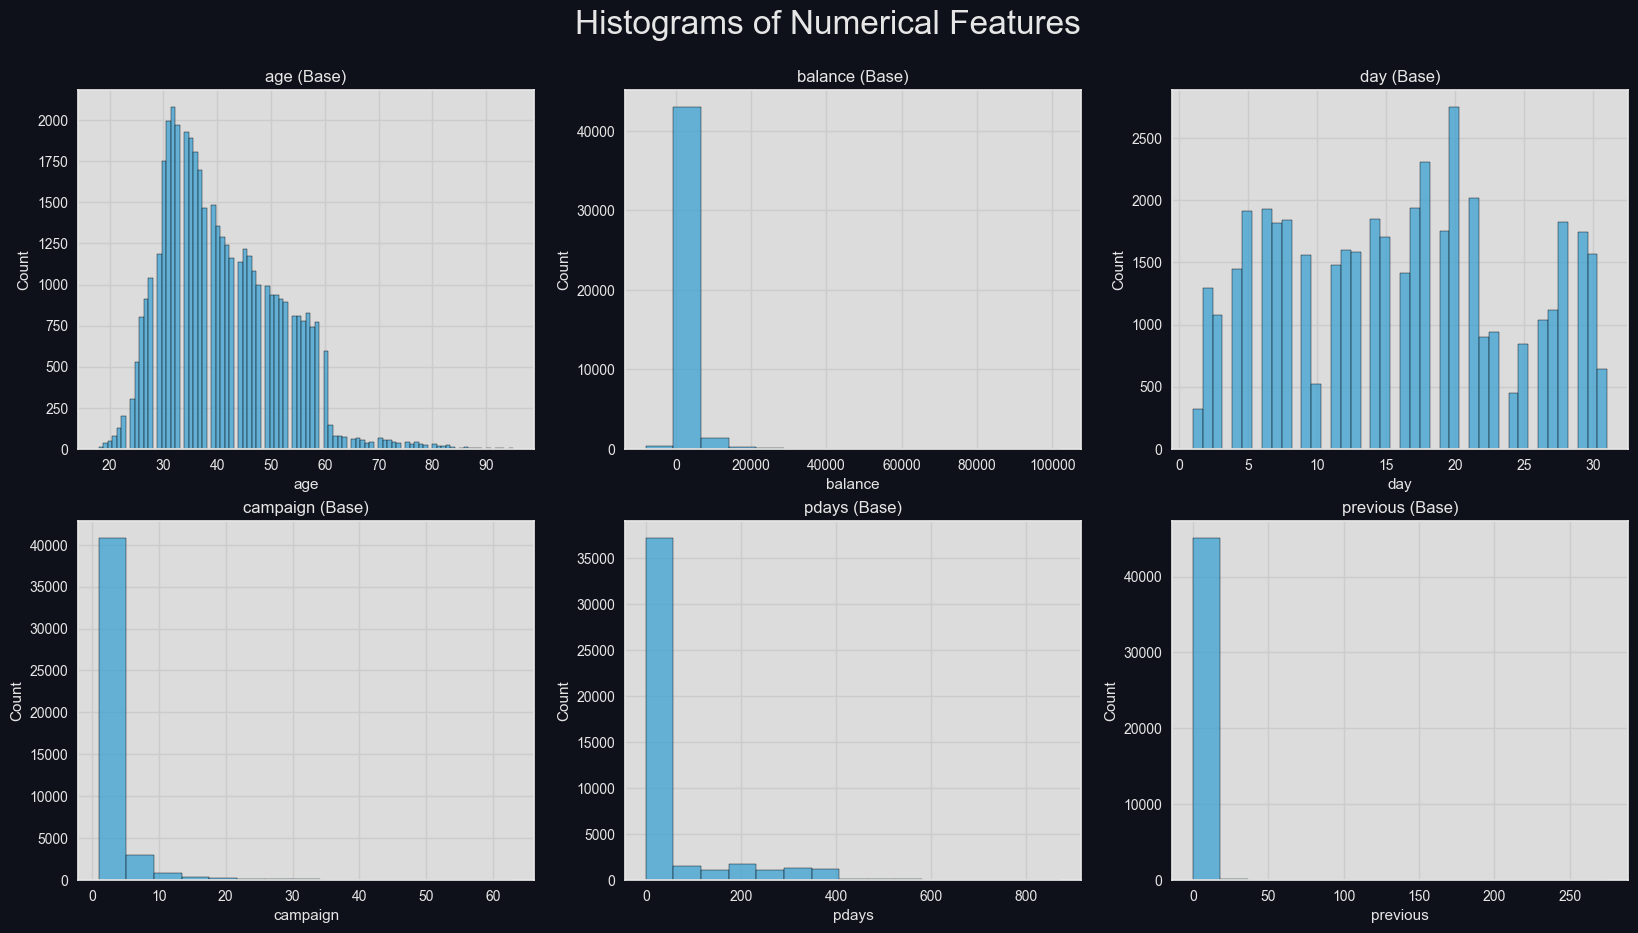

In [68]:
NumHists, axes = plt.subplots(2, 3, figsize=(20, 10))
for idx, col in enumerate(dfNum.columns):
    if idx in [1, 3, 4, 5]:
        bins = 15
    else:
        bins = 'auto'
    if col != 'y' and idx < 3:
        sns.histplot(ax = axes[0, idx],
                     data = df,
                     x = col,
                     kde = False,
                     bins = bins,
                     color = barColor)
        axes[0, idx].set_title(col + " (Base)")
    else:
        sns.histplot(ax = axes[1, idx-3],
                     data = df,
                     x = col,
                     kde = False,
                     bins = bins,
                     color = barColor)
        axes[1, idx-3].set_title(col + " (Base)")
NumHists.subplots_adjust(hspace=0.2)
NumHists.suptitle("Histograms of Numerical Features",
                  fontsize = 24,
                  color = titleColor)
NumHists.subplots_adjust(top=0.9)


In [97]:
labelName = df['job'].unique().tolist()
i = 0
labelName

['management',
 'technician',
 'entrepreneur',
 'blue-collar',
 'unknown',
 'retired',
 'admin.',
 'services',
 'self-employed',
 'unemployed',
 'housemaid',
 'student']

In [104]:
df['job'].value_counts(normalize=True)[df['job'].unique()]

management       0.209116
technician       0.168005
entrepreneur     0.032902
blue-collar      0.215289
unknown          0.006372
retired          0.050072
admin.           0.114415
services         0.091869
self-employed    0.034937
unemployed       0.028831
housemaid        0.027437
student          0.020755
Name: job, dtype: float64

In [103]:
df['job'].value_counts() / df['job'].value_counts().sum()

blue-collar      0.215289
management       0.209116
technician       0.168005
admin.           0.114415
services         0.091869
retired          0.050072
self-employed    0.034937
entrepreneur     0.032902
unemployed       0.028831
housemaid        0.027437
student          0.020755
unknown          0.006372
Name: job, dtype: float64

In [100]:
f"{labelName[i]}\n{df['job'].value_counts(normalize=True)[df['job'].unique()][i]*100:.2f}%"

'management\n20.91%'

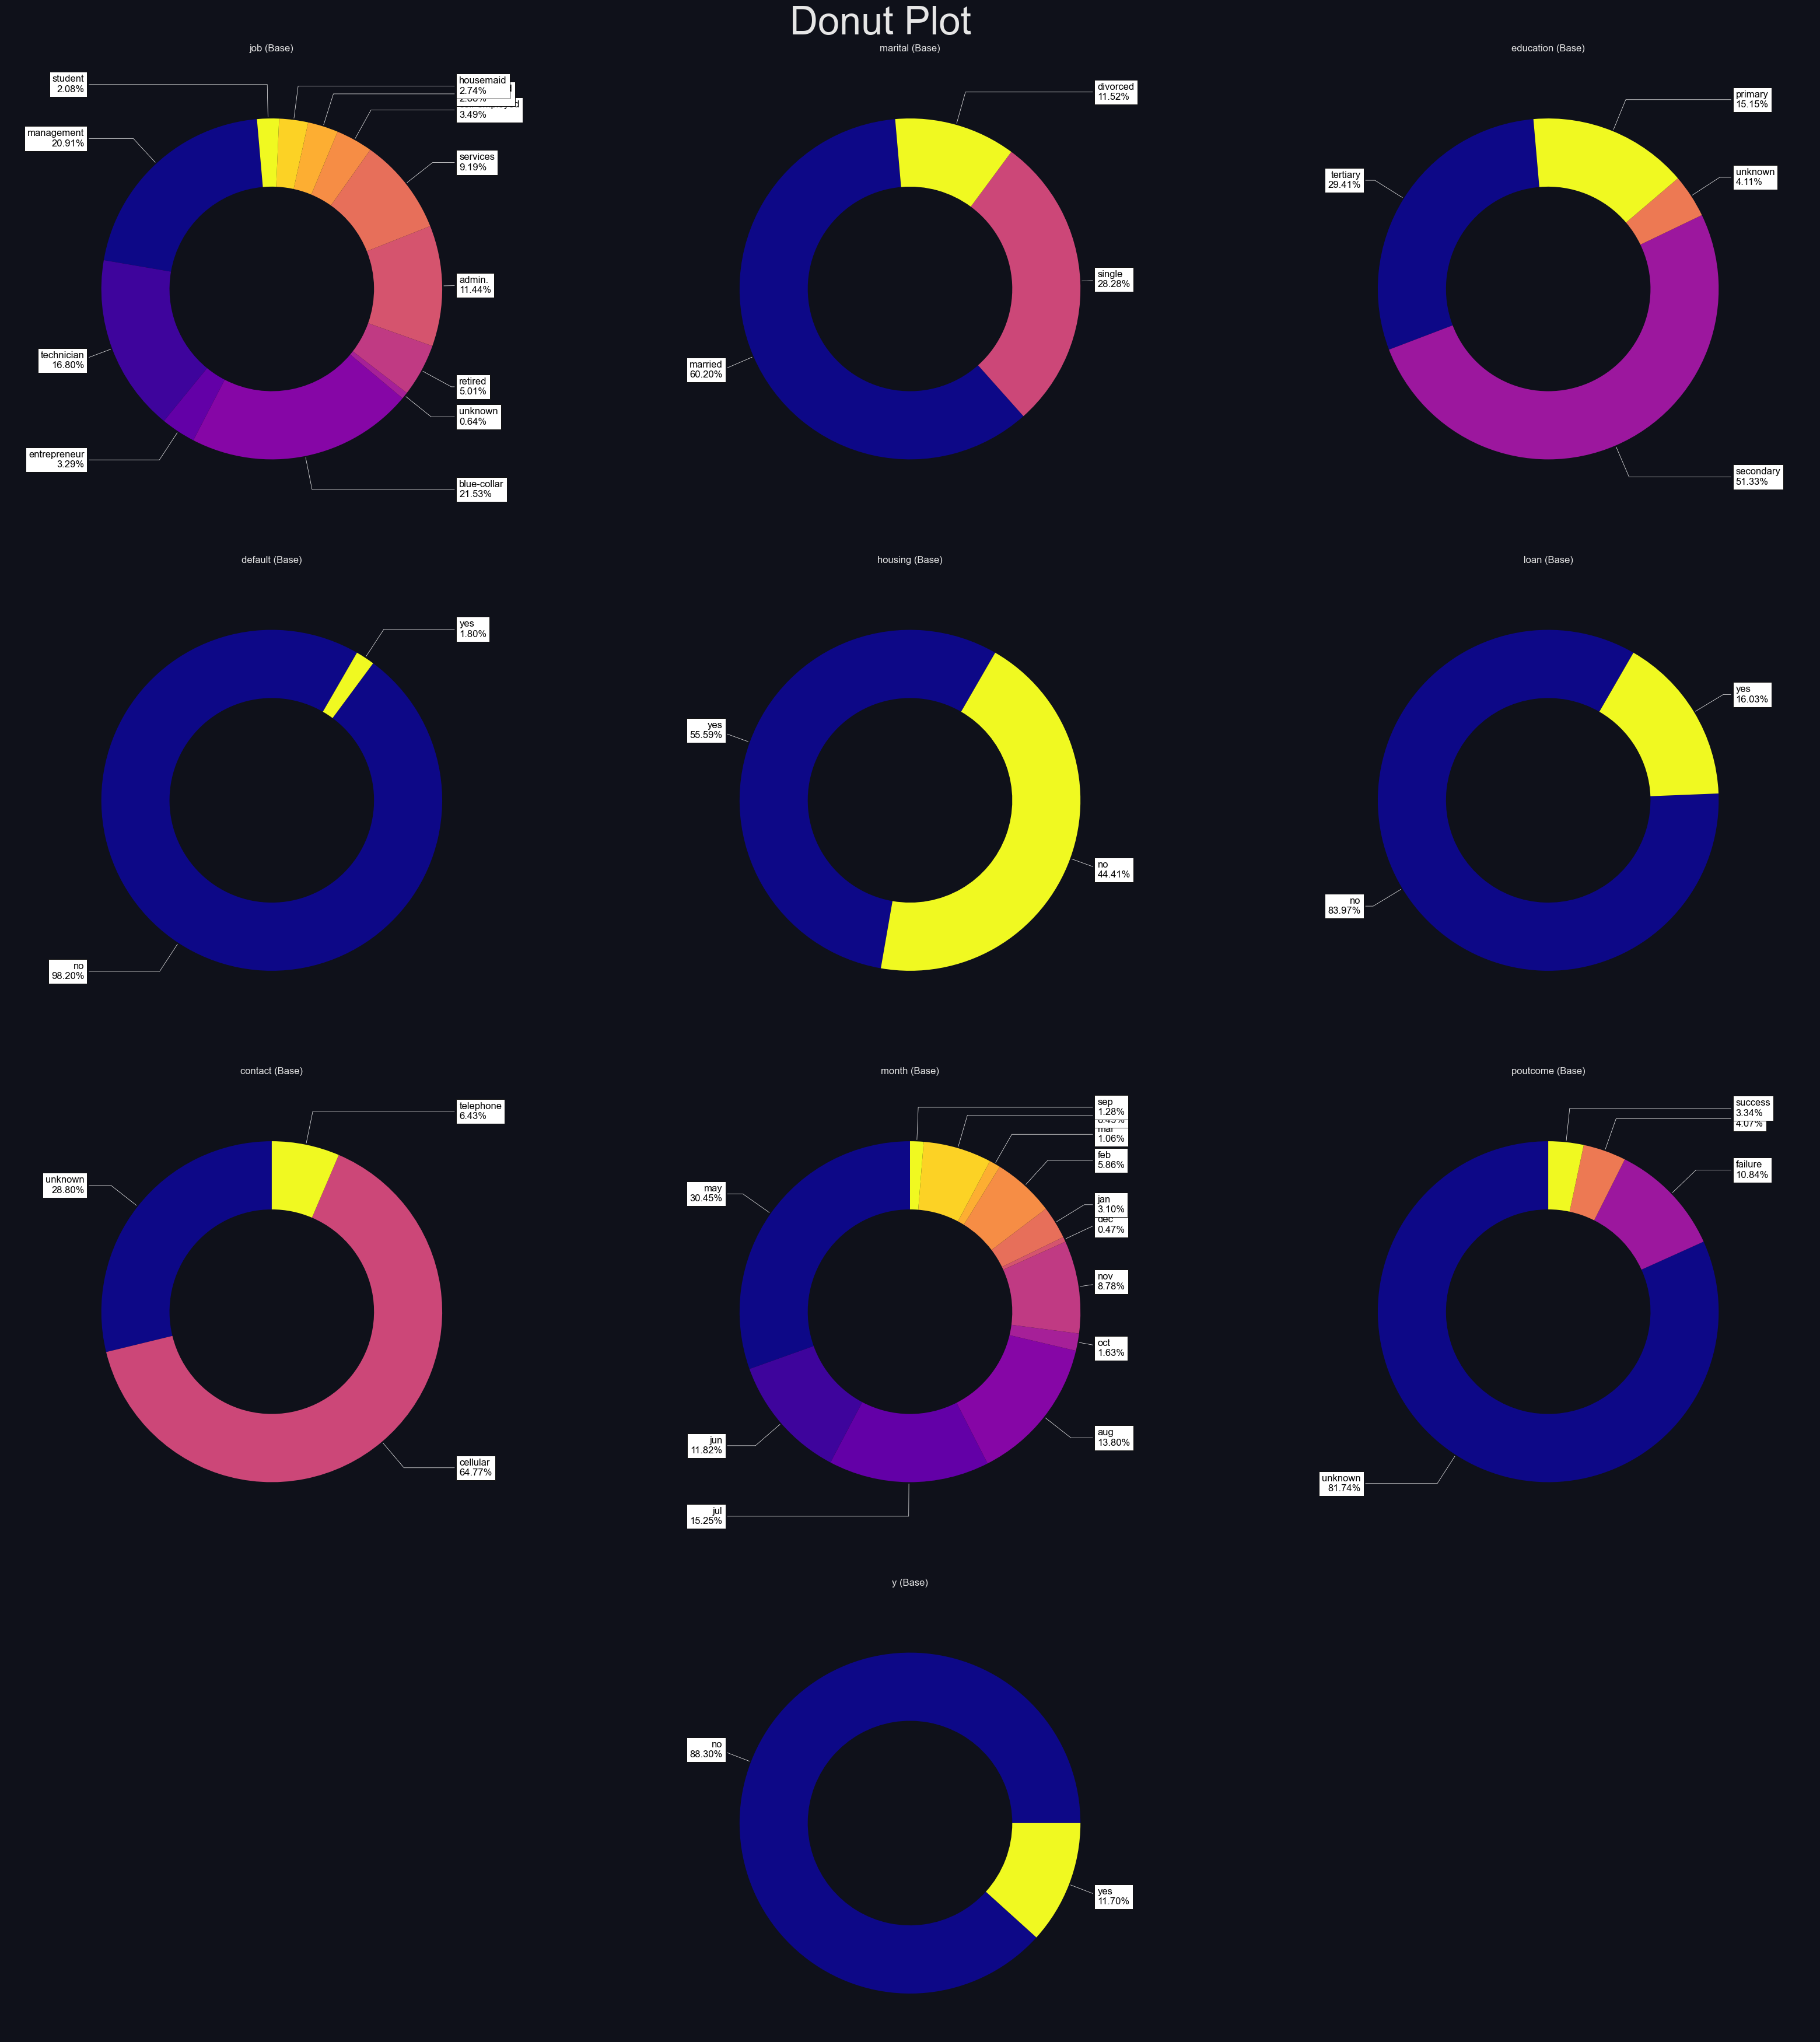

In [105]:
CateDonut, axes = plt.subplots(4, 3, figsize=(40,40))
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-", color='w', lw=0.5),
          bbox=bbox_props, zorder=0, va="center")
for idx, col in enumerate(dfCate.columns):
    labelName = df[col].unique().tolist()
    if idx < 3:
        wedges, texts = axes[0, idx].pie(df[col].value_counts(normalize=True)[df[col].unique()] * 100,
                                            startangle = 95,
                                            colors = pieCmap(np.linspace(0, 1, num=len(df[col].value_counts()))),
                                            wedgeprops=dict(width=0.4))
        axes[0, idx].set_title(col + " (Base)", pad=30)
        for i, p in enumerate(wedges):
            ang = (p.theta2 - p.theta1)/2. + p.theta1
            y = np.sin(np.deg2rad(ang))
            x = np.cos(np.deg2rad(ang))
            horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
            connectionstyle = "angle,angleA=0,angleB={}".format(ang)
            kw["arrowprops"].update({"connectionstyle": connectionstyle})
            axes[0, idx].annotate(f"{labelName[i]}\n{df[col].value_counts(normalize=True)[df[col].unique()][i]*100:.2f}%", xy=(x, y), xytext=(1.1*np.sign(x), 1.2*y),
                        horizontalalignment=horizontalalignment, **kw)
    elif idx < 6:
        wedges, texts = axes[1, idx-3].pie(df[col].value_counts(normalize=True)[df[col].unique()] * 100,
                                            startangle = 60,
                                            colors = pieCmap(np.linspace(0, 1, num=len(df[col].value_counts()))),
                                            wedgeprops=dict(width=0.4))
        axes[1, idx-3].set_title(col + " (Base)", pad=30)
        for i, p in enumerate(wedges):
            ang = (p.theta2 - p.theta1)/2. + p.theta1
            y = np.sin(np.deg2rad(ang))
            x = np.cos(np.deg2rad(ang))
            horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
            connectionstyle = "angle,angleA=0,angleB={}".format(ang)
            kw["arrowprops"].update({"connectionstyle": connectionstyle})
            axes[1, idx-3].annotate(f"{labelName[i]}\n{df[col].value_counts(normalize=True)[df[col].unique()][i]*100:.2f}%", xy=(x, y), xytext=(1.1*np.sign(x), 1.2*y),
                        horizontalalignment=horizontalalignment, **kw)
    elif idx < 9:
        wedges, texts = axes[2, idx-6].pie(df[col].value_counts(normalize=True)[df[col].unique()] * 100,
                                            startangle = 90,
                                            colors = pieCmap(np.linspace(0, 1, num=len(df[col].value_counts()))),
                                            wedgeprops=dict(width=0.4))
        axes[2, idx-6].set_title(col + " (Base)", pad=30)
        for i, p in enumerate(wedges):
            ang = (p.theta2 - p.theta1)/2. + p.theta1
            y = np.sin(np.deg2rad(ang))
            x = np.cos(np.deg2rad(ang))
            horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
            connectionstyle = "angle,angleA=0,angleB={}".format(ang)
            kw["arrowprops"].update({"connectionstyle": connectionstyle})
            axes[2, idx-6].annotate(f"{labelName[i]}\n{df[col].value_counts(normalize=True)[df[col].unique()][i]*100:.2f}%", xy=(x, y), xytext=(1.1*np.sign(x), 1.2*y),
                        horizontalalignment=horizontalalignment, **kw)
    else:
        wedges, texts = axes[3, 1].pie(df[col].value_counts(normalize=True)[df[col].unique()] * 100,
                                            colors = pieCmap(np.linspace(0, 1, num=len(df[col].value_counts()))),
                                            wedgeprops=dict(width=0.4))
        axes[3, 1].set_title(col + " (Base)", pad=30)
        for i, p in enumerate(wedges):
            ang = (p.theta2 - p.theta1)/2. + p.theta1
            y = np.sin(np.deg2rad(ang))
            x = np.cos(np.deg2rad(ang))
            horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
            connectionstyle = "angle,angleA=0,angleB={}".format(ang)
            kw["arrowprops"].update({"connectionstyle": connectionstyle})
            axes[3, 1].annotate(f"{labelName[i]}\n{df[col].value_counts(normalize=True)[df[col].unique()][i]*100:.2f}%", xy=(x, y), xytext=(1.1*np.sign(x), 1.2*y),
                        horizontalalignment=horizontalalignment, **kw)
        axes[3, 0].axis('off')
        axes[3, 2].axis('off')
CateDonut.suptitle("Donut Plot", fontsize=48, color=titleColor)
CateDonut.subplots_adjust(top=0.95)

In [24]:
df_vis = df.copy()
df_vis.columns
df_vis['month'] = pd.Categorical(df_vis['month'],['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])

Text(0.5, 0.98, 'Day and Month Distribution')

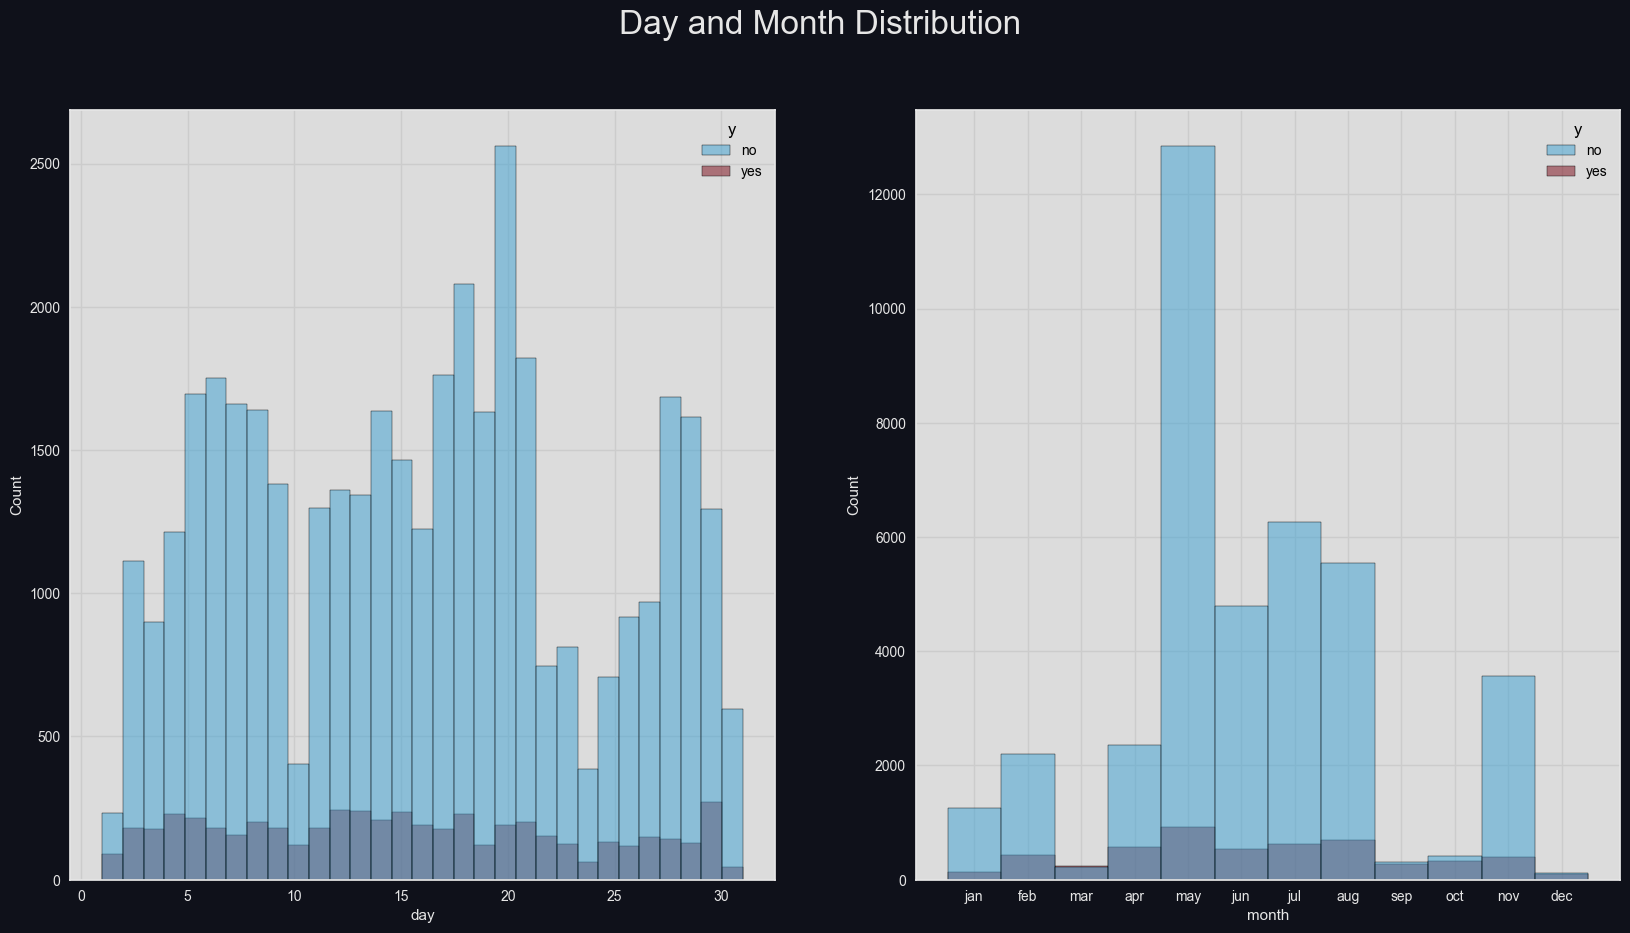

In [39]:
dayMonthPlot, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.histplot(data = df_vis, 
            x = 'day', 
            hue = 'y',
            bins=31,
            ax=axes[0],
            palette = snsPalette)
sns.histplot(data = df_vis, 
            x = 'month', 
            hue = 'y',
            ax=axes[1],
            palette = snsPalette)
for ax in axes:
    plt.setp(ax.get_legend().get_texts(), color=textColor)
dayMonthPlot.suptitle("Day and Month Distribution", fontsize=24, color=titleColor, horizontalalignment='center')

Text(0.5, 0.98, 'Loans Distribution')

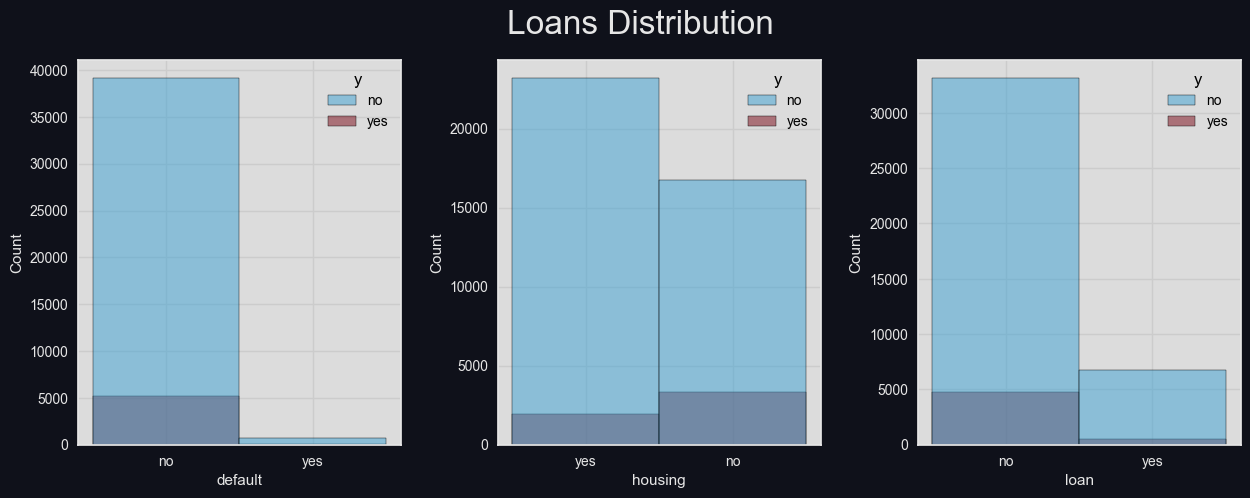

In [26]:
MoneyPlot, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data = df_vis, 
            x = 'default', 
            hue = 'y',
            palette = snsPalette,
            ax=axes[0])
sns.histplot(data = df_vis, 
            x = 'housing', 
            hue = 'y',
            palette = snsPalette,
            ax=axes[1])
sns.histplot(data = df_vis, 
            x = 'loan', 
            hue = 'y',
            palette = snsPalette,
            ax=axes[2])
for ax in axes:
    plt.setp(ax.get_legend().get_texts(), color=textColor)
MoneyPlot.subplots_adjust(wspace=0.3)
MoneyPlot.suptitle("Loans Distribution", fontsize=24, color=titleColor, horizontalalignment='center')

### **Grouping Data for Visualization**

In [27]:
age_group = pd.cut(df_vis['age'], [10, 20, 30, 40, 50, 60, 70, 80])
df_vis['age'] = age_group
sum_group = df_vis[['balance','age']].groupby('age').sum()
mean_group  = df_vis[['balance','age']].groupby('age').mean()

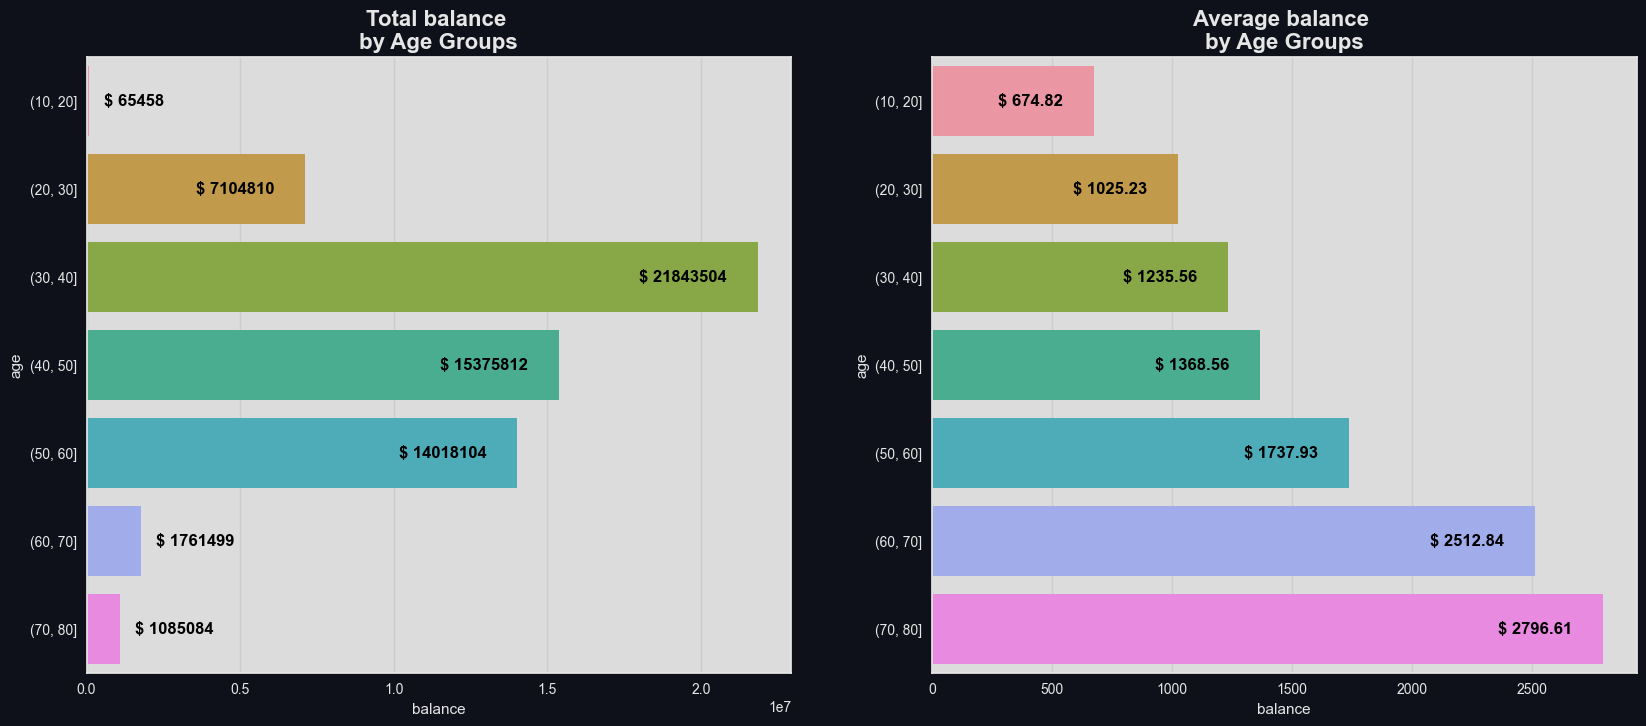

In [28]:
ageGroupPlot, axes = plt.subplots(1, 2, figsize=(20, 8))
axes = axes.flatten()

sns.barplot(x=sum_group['balance'], y=sum_group.index, ci=None, orient='h', ax=axes[0])
axes[0].set_title('Total balance \nby Age Groups', weight='bold', fontsize=16)

for i,v in enumerate(sum_group['balance']):
    if i in [1, 2, 3, 4]:
        axes[0].text(v-1000000, i, '$ {}'.format(v), horizontalalignment='right', verticalalignment='center', weight='bold', color='black', fontsize=12)
    else:
        axes[0].text(v+500000, i, '$ {}'.format(v), horizontalalignment='left', verticalalignment='center', weight='bold', color='black', fontsize=12)

sns.barplot(x=mean_group['balance'], y=mean_group.index, ci=None, orient='h', ax=axes[1])
axes[1].set_title('Average balance \nby Age Groups', weight='bold', fontsize=16)

for i,v in enumerate(mean_group['balance']):
    axes[1].text(v-130, i, '$ {}'.format(round(v,2)), horizontalalignment='right', verticalalignment='center', weight='bold', color='black', fontsize=12)

### **Pairplotting Data Samples**

We will be pairplotting a tenth of the whole dataset to see the distribution of the data.

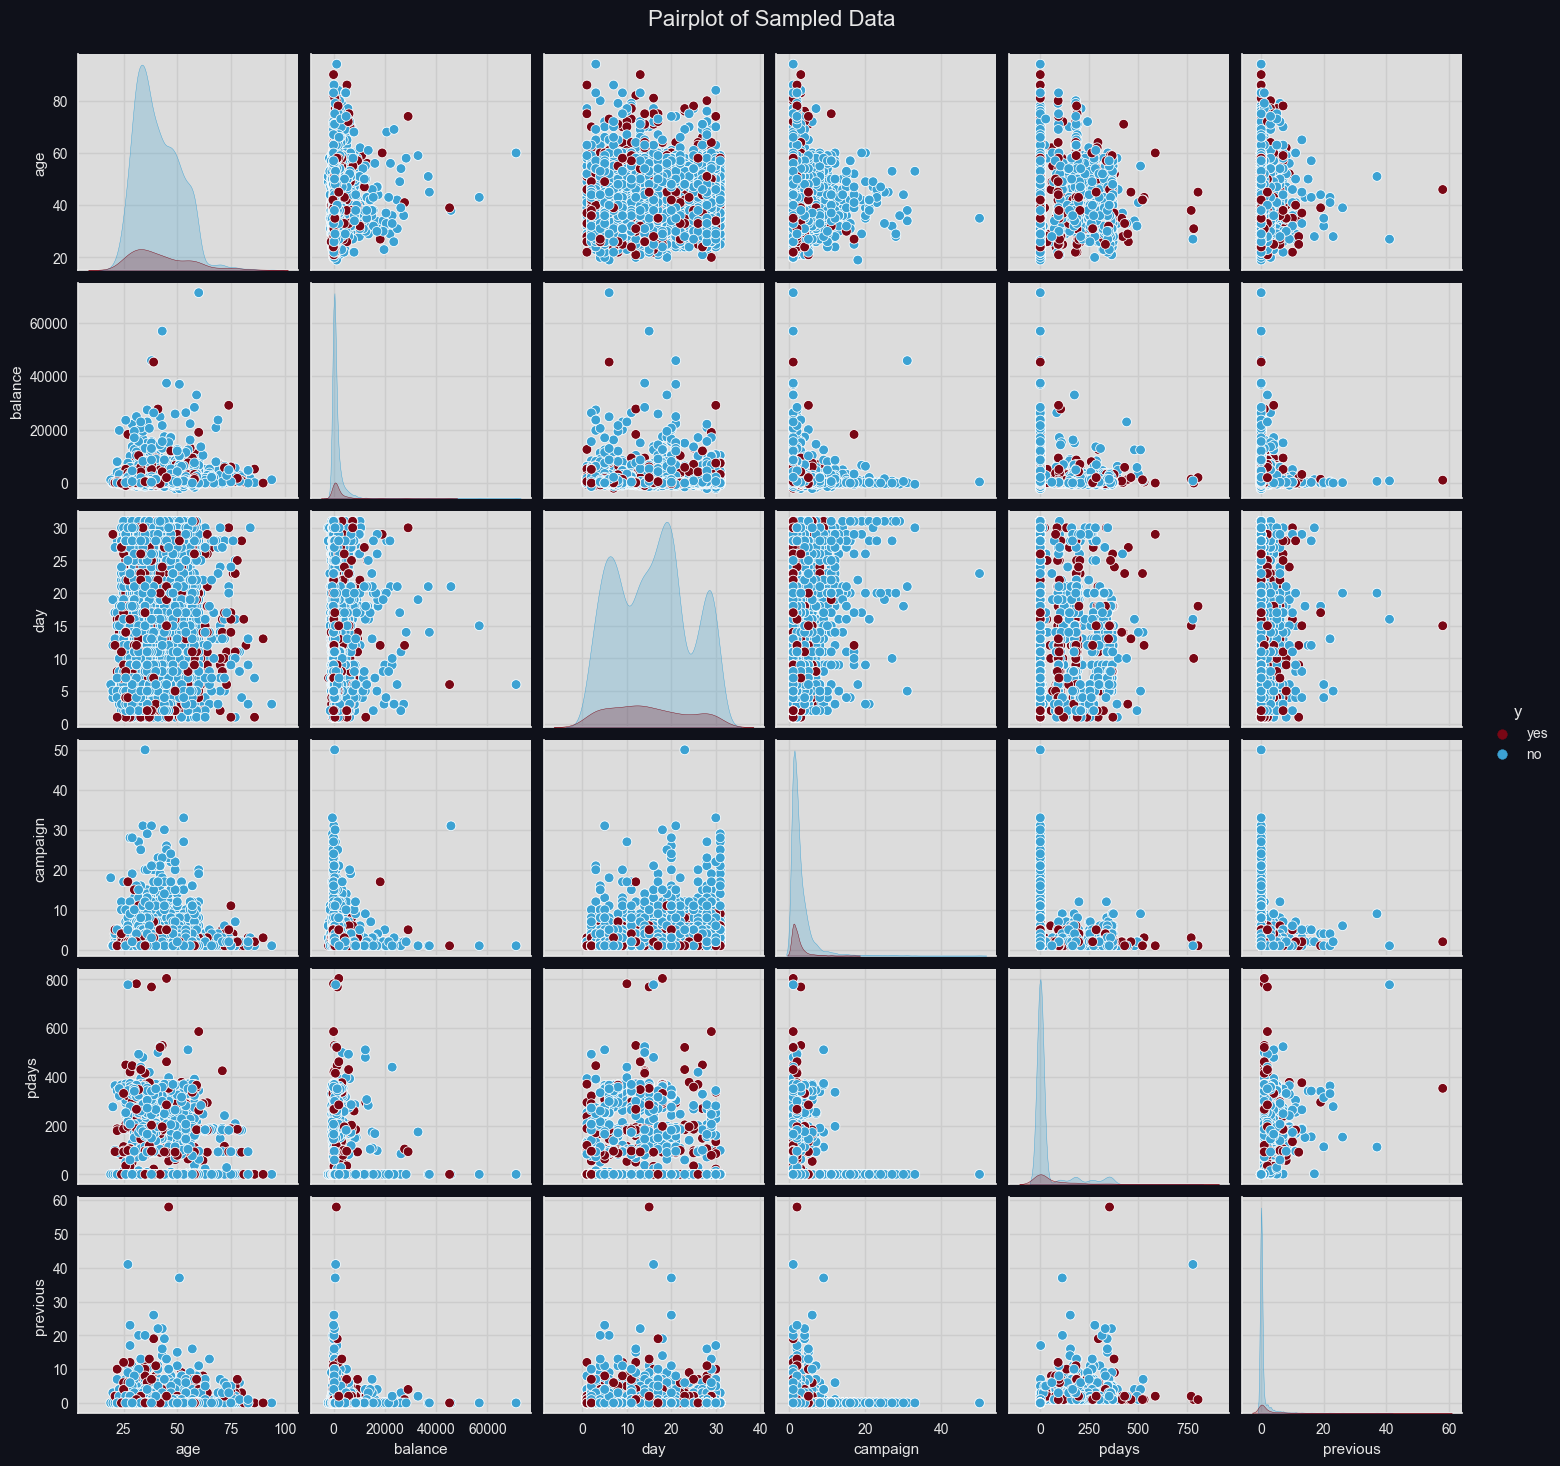

In [29]:
# PairSamp, ax = plt.subplots(1, 1, figsize=(10, 10))
PairSamp = sns.pairplot(data = df.sample(int(df.shape[0]/10), random_state=777),
             diag_kind = 'kde',
             hue = 'y',
             palette = snsPalette[::-1])
plt.setp(PairSamp._legend.get_title(), color=titleColor)
PairSamp.fig.suptitle("Pairplot of Sampled Data",
                      fontsize=16,
                      color=titleColor)
PairSamp.fig.subplots_adjust(top=0.95)

From the pairplot, we can see that the variance between features are quite low and the variance within features are quite high.

In [30]:
df.to_csv('bank_cleaned.csv', index=False)

In [108]:
dfOri = pd.read_csv('bank_cleaned.csv')
dfNum = dfOri.select_dtypes(include=['int64'])
dfCate = dfOri.select_dtypes(include=['object'])
df = dfOri.copy()
df

age  balance  day  campaign  pdays  previous           job   marital  \
0       58     2143    5         1      0         0    management   married   
1       44       29    5         1      0         0    technician    single   
2       33        2    5         1      0         0  entrepreneur   married   
3       47     1506    5         1      0         0   blue-collar   married   
4       33        1    5         1      0         0       unknown    single   
...    ...      ...  ...       ...    ...       ...           ...       ...   
45190   51      825   17         3      0         0    technician   married   
45191   71     1729   17         2      0         0       retired  divorced   
45192   72     5715   17         5    184         3       retired   married   
45193   57      668   17         4      0         0   blue-collar   married   
45194   37     2971   17         2    188        11  entrepreneur   married   

       education default housing loan    contact month poutcome    y  
0       tertiary      no     yes   no    unknown   may  unknown   no  
1      secondary      no     yes   no    unknown   may  unknown   no  
2      secondary      no     yes  yes    unknown   may  unknown   no  
3        unknown      no     yes   no    unknown   may  unknown   no  
4        unknown      no      no   no    unknown   may  unknown   no  
...          ...     ...     ...  ...        ...   ...      ...  ...  
45190   tertiary      no      no   no   cellular   nov  unknown  yes  
45191    primary      no      no   no   cellular   nov  unknown  yes  
45192  secondary      no      no   no   cellular   nov  success  yes  
45193  secondary      no      no   no  telephone   nov  unknown   no  
45194  secondary      no      no   no   cellular   nov    other   no  

[45195 rows x 16 columns]

### **Data Reconstruction**

In this section, we will be reconstructing the data by remapping unique values of each categorical features.

In [32]:
df.head()

age  balance  day  campaign  pdays  previous           job  marital  \
0   58     2143    5         1      0         0    management  married   
1   44       29    5         1      0         0    technician   single   
2   33        2    5         1      0         0  entrepreneur  married   
3   47     1506    5         1      0         0   blue-collar  married   
4   33        1    5         1      0         0       unknown   single   

   education default housing loan  contact month poutcome   y  
0   tertiary      no     yes   no  unknown   may  unknown  no  
1  secondary      no     yes   no  unknown   may  unknown  no  
2  secondary      no     yes  yes  unknown   may  unknown  no  
3    unknown      no     yes   no  unknown   may  unknown  no  
4    unknown      no      no   no  unknown   may  unknown  no

We will first print out all the unique values of each categorical features and look for unknowns and values that can be grouped together.

In [113]:
dfCate = df.select_dtypes(include=['object'])
for col in dfCate.columns:
    print(f"{col}: {dfCate[col].unique()}\n")

job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

marital: ['married' 'single' 'divorced']

education: ['tertiary' 'secondary' 'unknown' 'primary']

default: ['no' 'yes']

housing: ['yes' 'no']

loan: ['no' 'yes']

contact: ['unknown' 'cellular' 'telephone']

month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

poutcome: ['unknown' 'failure' 'other' 'success']

y: ['no' 'yes']



From the above, we will be selecting the following features to check value counts in percentage:
- job
- marital
- education
- contact
- poutcome

In [114]:
selectCol = ['job', 'marital', 'education', 'contact', 'poutcome']
for col in selectCol:
    print(f"{col}:\n{(df[col].value_counts(normalize=True)*100)}\n")

job:
blue-collar      21.528930
management       20.911605
technician       16.800531
admin.           11.441531
services          9.186857
retired           5.007191
self-employed     3.493749
entrepreneur      3.290187
unemployed        2.883062
housemaid         2.743666
student           2.075451
unknown           0.637239
Name: job, dtype: float64

marital:
married     60.201350
single      28.277464
divorced    11.521186
Name: marital, dtype: float64

education:
secondary    51.330899
tertiary     29.408120
primary      15.152119
unknown       4.108862
Name: education, dtype: float64

contact:
cellular     64.766014
unknown      28.804071
telephone     6.429915
Name: contact, dtype: float64

poutcome:
unknown    81.741343
failure    10.844120
other       4.071247
success     3.343290
Name: poutcome, dtype: float64



Now that we know the percentage of each value in each categorical features, we will be grouping the values as follow:
- job: group according to https://ilostat.ilo.org/resources/concepts-and-definitions/classification-occupation/ and 'unknown' to most common
- marital: group 'divorced' and 'single' together as 'alone' and 'married' as 'partnered'
- education: change 'unknown' to most common ('secondary')
- contact: group 'cellular' and 'telephone' into 'phone'
- poutcome: change 'other' to most common ('unknown')

In [115]:
df['job'] = df['job'].replace({'entrepreneur': 'high-skill-levels',
                                'management' : 'high-skill-levels',
                                'technician' : 'middle-skill-levels',
                                'self-employed' : 'high-skill-levels',
                                'admin.' : 'middle-skill-levels',
                                'services' : 'middle-skill-levels',
                                'housemaid' : 'middle-skill-levels',
                                'blue-collar' : 'low-None-skill-levels',
                                'retired' : 'low-None-skill-levels',
                                'unemployed' : 'low-None-skill-levels',
                                'student' : 'middle-skill-levels',
                                'unknown' : 'low-None-skill-levels'})

df['marital'] = df['marital'].replace({'single': 'Alone',
                                       'married': 'Partnered',
                                       'divorced': 'Alone'})

df['education'] = df['education'].replace({'unknown': 'secondary'})

df['contact'] = df['contact'].replace({'cellular': 'phone',
                                       'telephone' : 'phone',
                                        'unknown': 'unknown'})

df['poutcome'] = df['poutcome'].replace({'other': 'unknown'})



Text(0.5, 0.98, 'Education Distribution by Job')

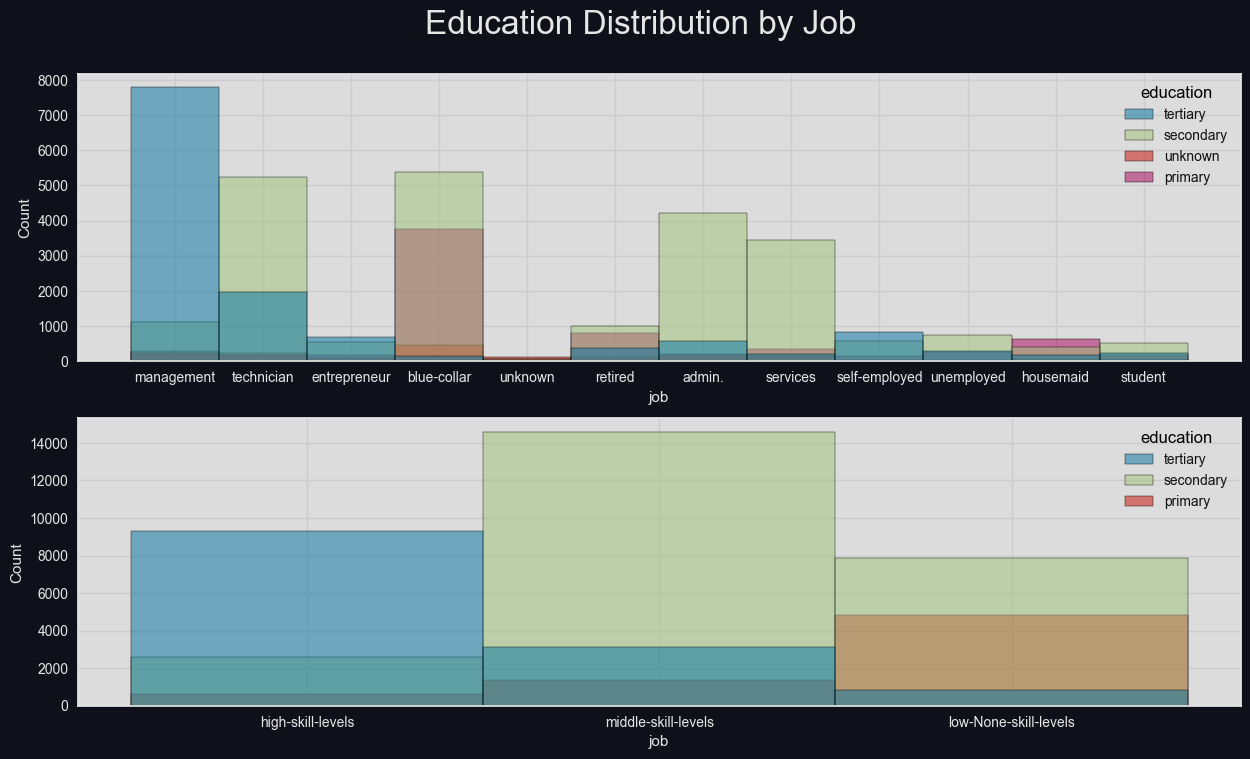

In [116]:
EduJobPlot, axes = plt.subplots(2, 1, figsize=(15, 8))
his1 =sns.histplot(data = dfOri, 
            x = dfOri['job'], 
            hue = 'education',
            legend = True,
            ax=axes[0])
his2 = sns.histplot(data = df, 
            x = df['job'], 
            hue = 'education',
            ax=axes[1])

plt.setp(his1.get_legend().get_texts(), color='k') 
plt.setp(his2.get_legend().get_texts(), color='k')

EduJobPlot.subplots_adjust(hspace=0.2, top=0.9)
EduJobPlot.suptitle("Education Distribution by Job", fontsize=24, color=titleColor, horizontalalignment='center')

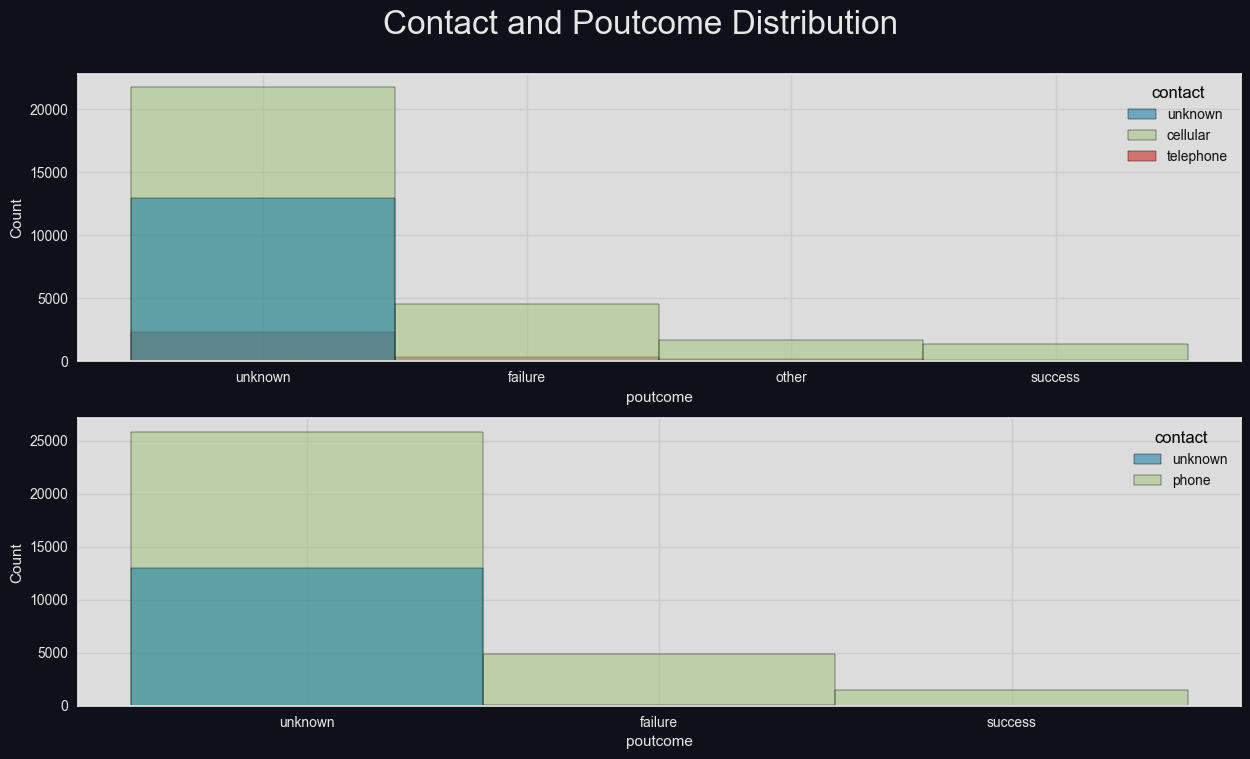

In [117]:
contactPoutcomePlot, axes = plt.subplots(2, 1, figsize=(15, 8))
his1 = sns.histplot(data = dfOri, 
            x = 'poutcome', 
            hue = 'contact',
            ax=axes[0])
his2 = sns.histplot(data = df, 
            x = 'poutcome', 
            hue = 'contact',
            ax=axes[1])
plt.setp(his1.get_legend().get_texts(), color='k') 
plt.setp(his2.get_legend().get_texts(), color='k')
contactPoutcomePlot.suptitle("Contact and Poutcome Distribution", fontsize=24, color=titleColor, horizontalalignment='center')
contactPoutcomePlot.subplots_adjust(top=0.9, hspace=0.2)

In [118]:
figToSave = [NumHists, CateDonut, dayMonthPlot, MoneyPlot, ageGroupPlot, PairSamp, EduJobPlot, contactPoutcomePlot]
figName = ['00_NumHists', '01_CateDonut', '02_dayMonthPlot', '03_MoneyPlot', '04_ageGroupPlot', '05_PairSamp', '06_EduJobPlot', '07_contactPoutcomePlot']
for fig, filename in zip(figToSave, figName):
    fig.savefig(os.path.join('img', 'dataexplo', filename + '.png'),
                bbox_inches='tight')

In [ ]:
df.to_csv('bankGroupedCate.csv', index=False)

### **Data Exploration's Conclusion**

From the overall report,

Plotting Histogram of Numerical Features:

|Feature Names|Distribution|
|-|-|
|age|Right-skewed|
|balance|Right-skewed|
|day|Uniform|
|campaign|Right-skewed|
|pdays|Right-skewed|
|previous|Right-skewed|

Plotting Values Count of Categorical Features:

|Feature Names|What we got|
|-|-|
|job|Most common jobs are 'blue-collar', 'management' and 'technician' (59.2% in total).|
|marital|60.2% of this data are 'Married', 28.3% are 'Single' and the rest are 'Divorced'|
|education|Mostly 'secondary' (51.3%) followed by 'tertiary' (29.4%), 'primary' (15.2%) and 'unknown' (4.1%)|
|default|Mostly 'false' (98.2%)|
|housing|55.6% are 'true' and the rest are 'false'|
|loan|Mostly 'false' (84%)|
|contact|Mostly 'cellular' (64.8%) followed by 'unknown' (28.8%) and 'telephone' (6.4%)|
|month|Mostly 'may' (30.4%)|
|poutcome|Mostly 'unknown' (81.7%) followed by 'failure' (10.8%), 'other' (4.1%) and 'success' (3.3%)|

Good things of this dataset:

|Good Things|Explanation|
|-|-|
|Filled Data in Numerical Features|There are no missing data (NaN) or unknown in numerical features of this dataset.|

Bad things of this dataset:

|Bad Things|Explanation|
|-|-|
|Data Explanation|Most features come with little to no explanation or bad explanation.|
|Data Distribution|There are no normal distributed data. Almost all of them are right-skewed.|
|Data Variation|As we can see when pairplotting, variance between features are quite low and variance within class are quite high in some feature, which means that data variation is very bad.|
|Correlation|There are a lot of high correlation between features.|
|'poutcome'|This feature's data are mostly 'unknown' (around 81.7%).|
|Output data|The output is imbalanced. ('yes' is 11.7% and 'no' is 88.3%)|
|Unknown Data|Unclear explanation of what unknown data means and there are a lot of them in categorical features.|

**NOTE**: For all 'Unknown' data in categorical features, we assumed 'Unknown' as a type of data because there are quite a lot of 'Unknown' data.

Furthermore, because we are dealing with a dataset from bank, those 'Unknown' data might be undisclosed information of the customers.

<hr>

Since we are going to use clustering algorithms (unsupervised learning), we will drop the output (y) from the dataset.

## **Data Preprocessing**

### **Remove Outliers**

In [42]:
df = pd.read_csv('bankGroupedCate.csv')
dfCate = df.select_dtypes(include=['object'])
dfNum = df.select_dtypes(include=['int64'])

We will be using k-Nearest Neighbors Anomaly Detection to remove outliers.

In [43]:
# create arrays
dfnbrs = df.copy()
dfnbrs = dfnbrs.drop(dfCate.columns.to_list(), axis=1)
X = dfnbrs.values

In [44]:
# instantiate model
nbrs = NearestNeighbors(n_jobs=-1).fit(X)

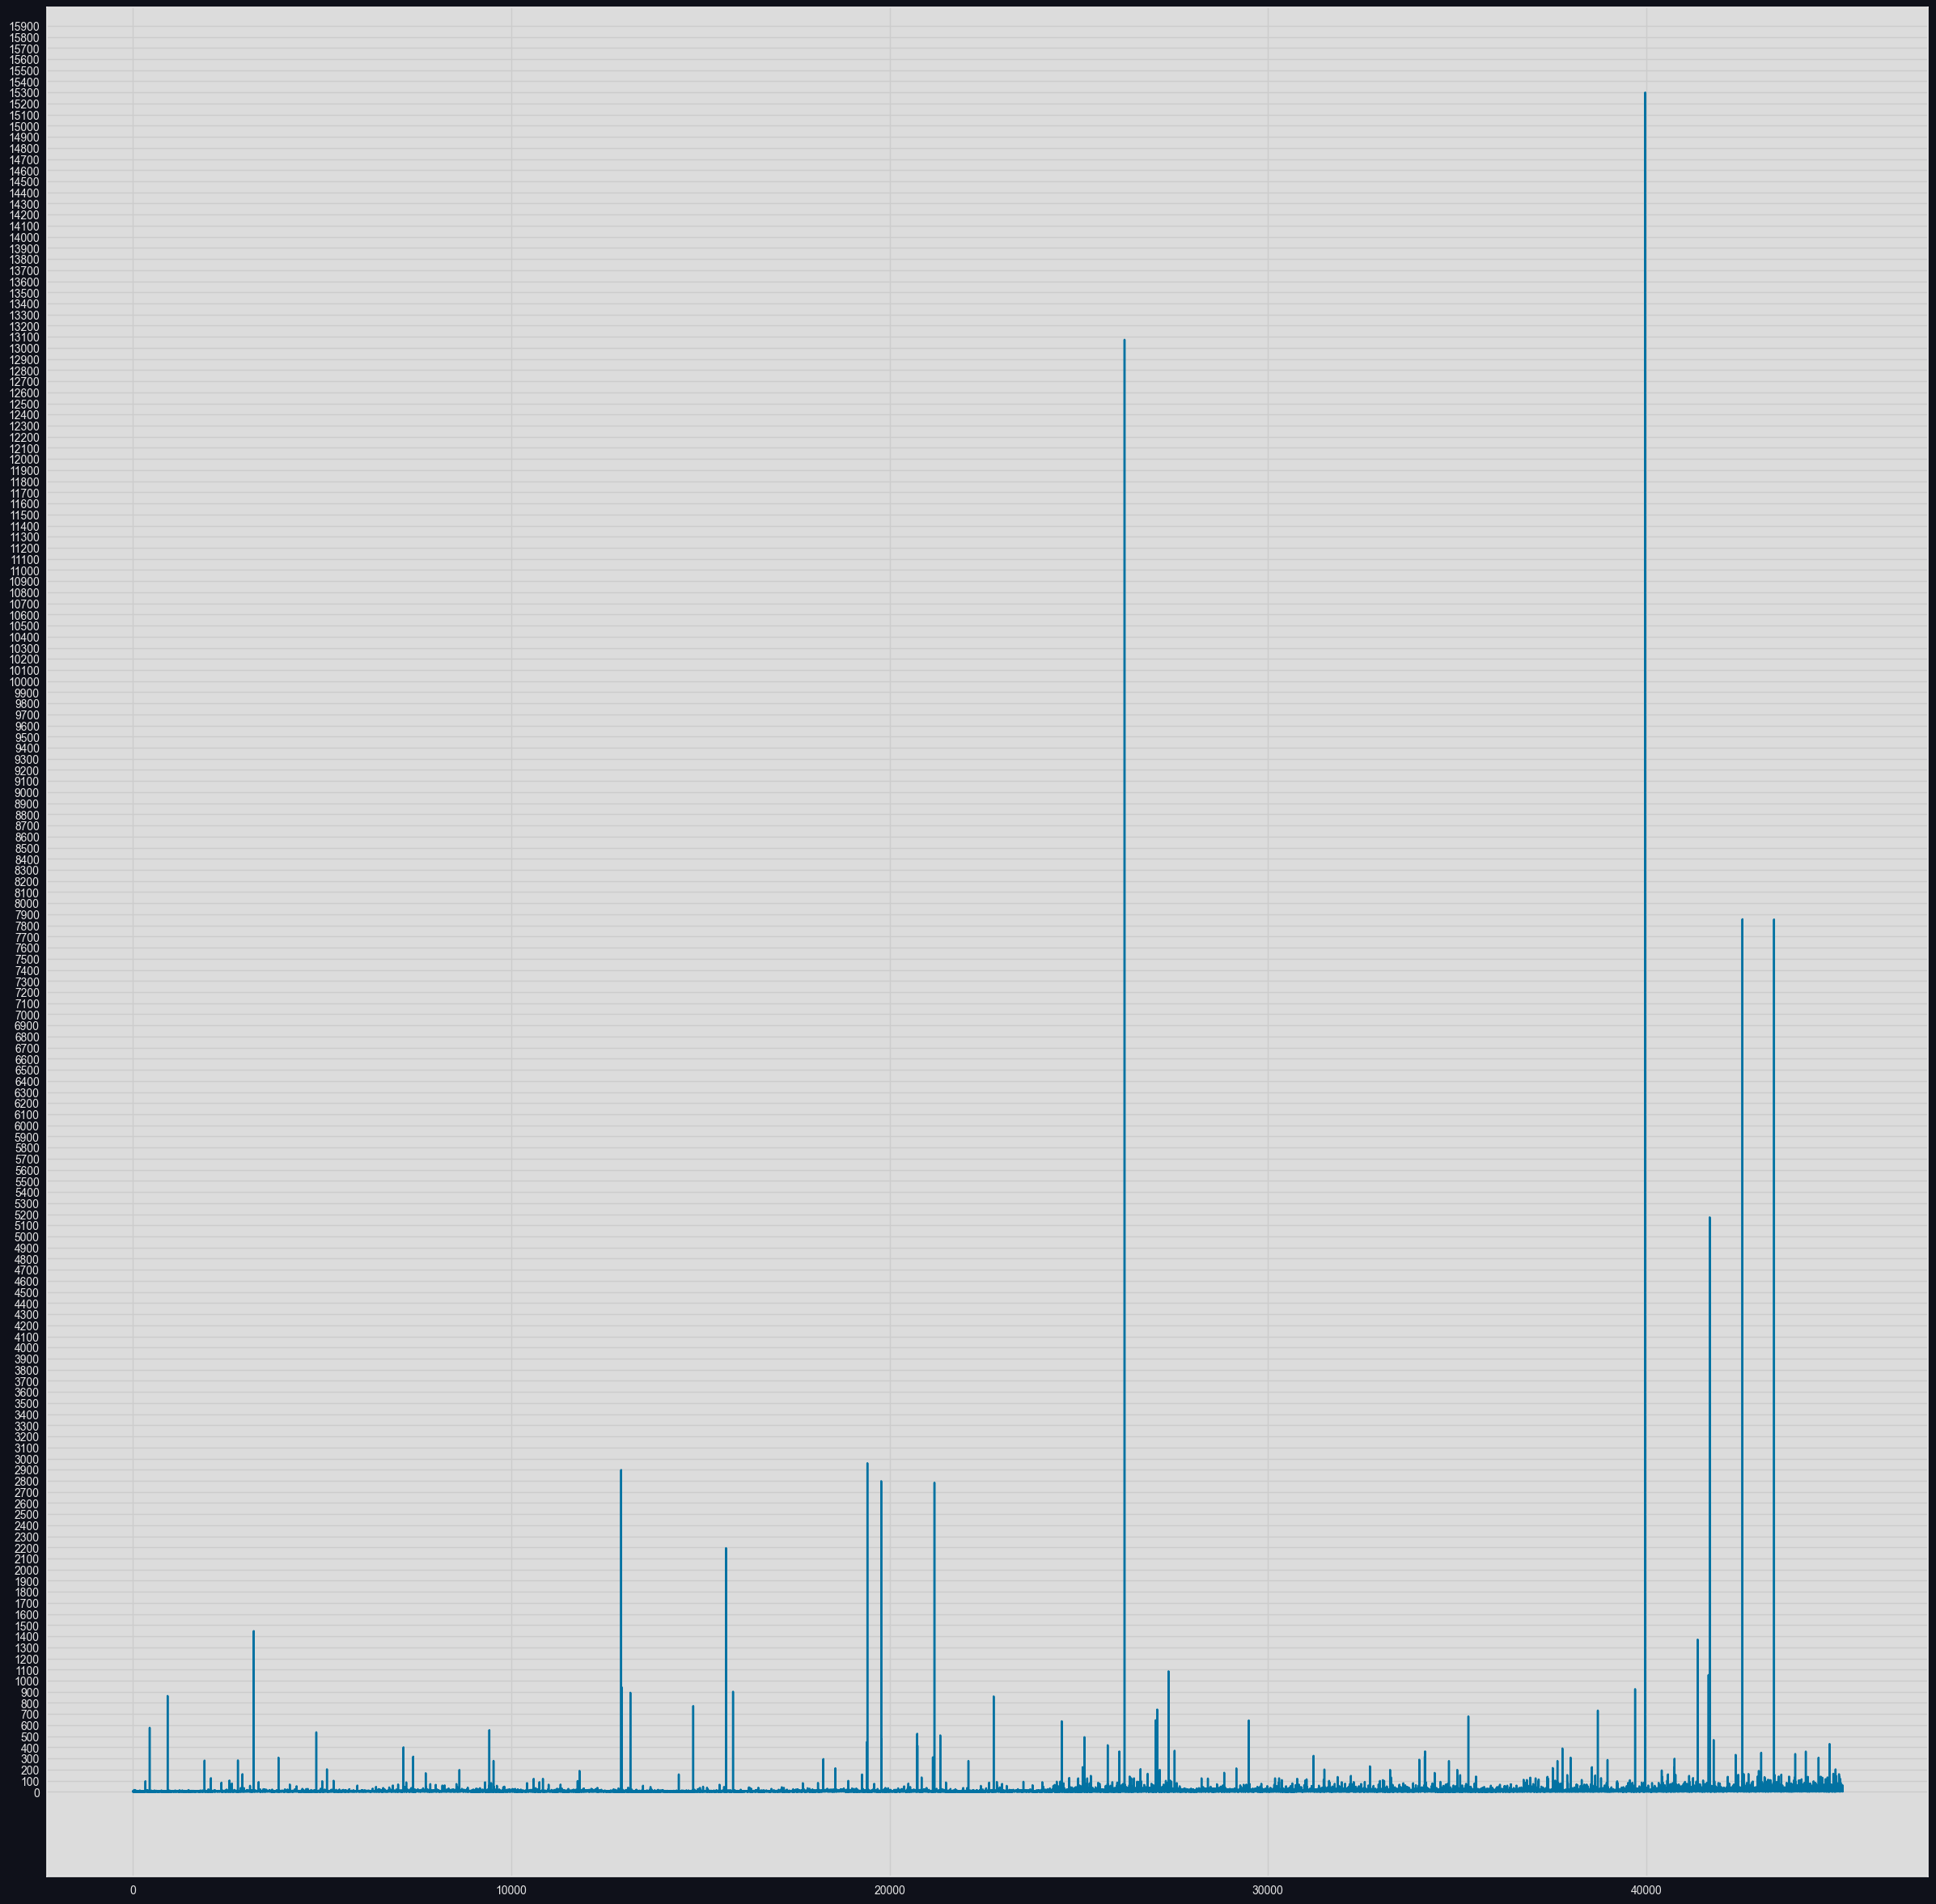

In [45]:
# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(X)
# plot mean of k-distances of each observation
anomalyPlot, ax = plt.subplots(1, 1, figsize=(30, 30))
ax.set_yticks(np.arange(0, 16000, 100))
ax.plot(distances.mean(axis =1))

In [46]:
# visually determine cutoff values > 100.0
outlier_index = np.where(distances.mean(axis = 1) > 100.0)
# filter outlier values
outlier_values = df.iloc[outlier_index]
outlier_values

age  balance  day  campaign  pdays  previous                    job  \
446     39    45248    6         1      0         0    middle-skill-levels   
920     44    58544    7         2      0         0    middle-skill-levels   
1896    57    -3313    9         1      0         0      high-skill-levels   
2065    55    18722   12         2      0         0  low-None-skill-levels   
2554    28    26765   13         8      0         0    middle-skill-levels   
...    ...      ...  ...       ...    ...       ...                    ...   
45020   28     1918   18         1    616         1      high-skill-levels   
45021   45     2048   18         1    804         1      high-skill-levels   
45094   50     8205   25         3    508         1      high-skill-levels   
45102   78    14204   26         1    183         1  low-None-skill-levels   
45130   49      780    8         1    871         2  low-None-skill-levels   

         marital  education default housing loan  contact month poutcome    y  
446        Alone  secondary      no     yes   no  unknown   may  unknown  yes  
920    Partnered  secondary      no     yes   no  unknown   may  unknown   no  
1896   Partnered   tertiary     yes     yes  yes  unknown   may  unknown   no  
2065   Partnered  secondary      no     yes   no  unknown   may  unknown   no  
2554       Alone  secondary      no      no   no  unknown   may  unknown   no  
...          ...        ...     ...     ...  ...      ...   ...      ...  ...  
45020  Partnered   tertiary      no      no   no    phone   oct  failure   no  
45021      Alone   tertiary      no     yes   no    phone   oct  failure  yes  
45094  Partnered   tertiary      no     yes   no    phone   oct  unknown   no  
45102  Partnered    primary      no      no   no    phone   oct  unknown   no  
45130      Alone   tertiary      no      no   no    phone   nov  failure   no  

[186 rows x 16 columns]

In [47]:
dropOutliers = outlier_index[0].tolist()
df.drop(dropOutliers, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45009 entries, 0 to 45008
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45009 non-null  int64 
 1   balance    45009 non-null  int64 
 2   day        45009 non-null  int64 
 3   campaign   45009 non-null  int64 
 4   pdays      45009 non-null  int64 
 5   previous   45009 non-null  int64 
 6   job        45009 non-null  object
 7   marital    45009 non-null  object
 8   education  45009 non-null  object
 9   default    45009 non-null  object
 10  housing    45009 non-null  object
 11  loan       45009 non-null  object
 12  contact    45009 non-null  object
 13  month      45009 non-null  object
 14  poutcome   45009 non-null  object
 15  y          45009 non-null  object
dtypes: int64(6), object(10)
memory usage: 5.5+ MB


After removing outliers, we are left with <u>**45009  instances**</u> (originally 45211 instances).

### **Label Encoder**

We will be using Label Encoder to encode categorical features.

In [ ]:
class LabelEncoder2():
    def __init__(self, toEncode:list, columnToEncode:list):
        self.toEncode = toEncode
        self.columnToEncode = columnToEncode
        
    def transform(self,X,y=None,**transform_params):
        for toEn, colToEn in zip(self.toEncode, self.columnToEncode):
            X[colToEn] = X[colToEn].apply(lambda x: toEn.index(x))
        return X
    
    def fit(self, X, y=None, **fit_params):
        return self

In [ ]:
dfForVisual_Original = df.copy()

In [ ]:
dfForVisual_LabelEncode = df.copy()
dfLabelEncode = df.copy()

In [ ]:
# LabelEncoder
toend = [['no', 'yes'],
         ['no', 'yes'],
         ['no', 'yes'],
         ['low-None-skill-levels', 'middle-skill-levels', 'high-skill-levels'],
         ['Alone', 'Partnered'],
         ['primary', 'secondary', 'tertiary'],
         ['unknown', 'phone'],
         ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
         ['unknown', 'failure', 'success'],
         ['no', 'yes'],
         ]
coltoend = ['default', 'housing', 'loan','job', 'marital', 'education', 'contact', 'month', 'poutcome', 'y']
# To visualize the data
LB = LabelEncoder2(toEncode = toend,
                   columnToEncode = coltoend)

dfForVisual_LabelEncode = LB.transform(dfForVisual_LabelEncode)
# To train the model
LBO = LabelEncoder2(toEncode = toend,
                   columnToEncode = coltoend)

dfLabelEncode = LBO.transform(dfLabelEncode)

In [ ]:
df = dfLabelEncode.copy()
df.describe()

### **Feature Scaling**

In [ ]:
dfLabelEncode_Scaling = df.copy()
df_Scaling = dfForVisual_Original.copy()

In [ ]:
StandardScale = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

StandardScaleP = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [ ]:
for idx in dfLabelEncode_Scaling.columns:
    dfLabelEncode_Scaling[idx] = StandardScale.fit_transform(dfLabelEncode_Scaling[idx].values.reshape(-1,1))

for idx, col in enumerate(dfNum.columns):
    df_Scaling[col] = StandardScaleP.fit_transform(df_Scaling[col].values.reshape(-1,1))
    
df = dfLabelEncode_Scaling.copy()

### **Feature Extraction**

In [ ]:
dfLabelEncode_Scaling_FE = df.copy()

In [ ]:
def checkCorrFF(df, figw, figh):
    corr, ax = plt.subplots(1, 1, figsize=(figw, figh))
    cor = df.corr()
    sns.heatmap(cor, annot=True, cmap='inferno', ax=ax)
    return corr

In [ ]:
scaledFECorr = checkCorrFF(dfLabelEncode_Scaling_FE, 20, 10)

In [ ]:
coltoDel = ['month', 'day']
dfFE = dfLabelEncode_Scaling_FE.drop(coltoDel, axis=1)
dfKpro = df_Scaling.drop(coltoDel, axis=1)

We will be using Principal Component Analysis (PCA) to extract features.

#### **Principal Component Analysis (PCA)**

In [ ]:
def dfPCAGenerator(df, threshold):
    dfPCA = df.copy()
    pca = PCA(n_components = len(dfPCA.columns))           
    pca_data = pca.fit_transform(dfPCA)          

    print(pca.explained_variance_ratio_.cumsum())
    print(pca.explained_variance_ratio_.cumsum().shape)
    varThreshold = threshold
    var = np.where(pca.explained_variance_ratio_.cumsum() > varThreshold)[0][0]
    print(f'Number of components to explain {varThreshold*100}% of variance: {var}')

    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    for i in range(0, len(pca.explained_variance_ratio_)):
        ax.plot(i+1, pca.explained_variance_ratio_[i], 'ro')
        
    pca = PCA(n_components = var)
    x_pca = pca.fit_transform(dfPCA)
    col = [
        str(f'PC{i+1}') for i in range(0, len(pca.explained_variance_ratio_))
        ]

    dfPCA = pd.DataFrame(x_pca, columns = col)
    return dfPCA, fig

In [ ]:
dfPCA, PCAPlot = dfPCAGenerator(dfFE, 0.90)

In [ ]:
figToSave = [anomalyPlot, scaledFECorr, PCAPlot]
figName = ['08_anomalyPlot', '09_scaledFECorr', '10_PCAPlot']
for fig, filename in zip(figToSave, figName):
    fig.savefig(os.path.join('img', 'dataprepro', filename + '.png'),
                bbox_inches='tight')

#### **Save to CSV**
We do it so we don't have to run everything again every single time. It takes forever to run! ;-;

In [ ]:
dfForVisual_Original.drop(['day','month'], axis=1, inplace=True)
dfForVisual_LabelEncode.drop(['day','month'], axis=1, inplace=True)

In [ ]:
# Visualize the data
dfForVisual_Original.to_csv('dfForVisualization.csv', index=False)
dfForVisual_LabelEncode.to_csv('dfForVisualization_LabelEncode.csv', index=False)
# Model training
dfFE.to_csv('dfFEForModeling.csv', index=False)
dfPCA.to_csv('dfPCAForModeling.csv', index=False)
dfKpro.to_csv('dfKproForModeling.csv', index=False)

## **Modeling**

In [ ]:
def clusterVisualization(df, numCol, cateCol, DBSCAN=False):
    # Violin Plot for numerical data
    plotViolin, axes = plt.subplots(3, 2, figsize=(20, 15)) if not DBSCAN else plt.subplots(3, 2, figsize=(40, 15))
    for idx, col in enumerate(numCol):
        if col != 'Cluster':
            if idx < 2:
                X = df[col].groupby(df['Cluster']).value_counts()
                sns.violinplot(data=df, x='Cluster', y=col, palette='copper_r', ax=axes[0, idx])
            elif idx < 4:
                X = df[col].groupby(df['Cluster']).value_counts()
                sns.violinplot(data=df, x='Cluster', y=col, palette='copper_r', ax=axes[1, idx-2])
            else:
                X = df[col].groupby(df['Cluster']).value_counts()
                sns.violinplot(data=df, x='Cluster', y=col, palette='copper_r', ax=axes[2, 0])
                axes[2, 1].axis('off')
    
    # Bar plot for categorical variables
    plotBar, axes = plt.subplots(3, 3, figsize=(30, 15)) if not DBSCAN else plt.subplots(3, 3, figsize=(60, 15))
    for idx, col in enumerate(cateCol):
        if idx < 3:
            X = df[col].groupby(df['Cluster']).value_counts()
            sns.barplot(x=X.index.get_level_values(0), y=X.values, hue=X.index.get_level_values(1), palette='copper_r', ax=axes[0, idx])
            plt.setp(axes[0, idx].get_legend().get_texts(), color='k', fontsize=12)
        elif idx < 6:
            X = df[col].groupby(df['Cluster']).value_counts()
            sns.barplot(x=X.index.get_level_values(0), y=X.values, hue=X.index.get_level_values(1), palette='copper_r', ax=axes[1, idx-3])
            plt.setp(axes[1, idx-3].get_legend().get_texts(), color='k', fontsize=12)
        else:
            X = df[col].groupby(df['Cluster']).value_counts()
            sns.barplot(x=X.index.get_level_values(0), y=X.values, hue=X.index.get_level_values(1), palette='copper_r', ax=axes[2, idx-6])
            plt.setp(axes[2, idx-6].get_legend().get_texts(), color='k', fontsize=12)
    
    # Heatmap Plot
    dfHeat = pd.read_csv('dfForVisualization_LabelEncode.csv')
    label = df['Cluster']
    
    MinMaxScale = MinMaxScaler()
    for col in dfHeat.columns:
        dfHeat[col] = MinMaxScale.fit_transform(dfHeat[[col]])
    
    memb =  pd.Series(label, index=dfHeat.index)
    
    minncom = min(df['Cluster'].unique().tolist())
    maxncom = max(df['Cluster'].unique().tolist())
    
    clusters = ['Cluster {}'.format(i) for i in range(minncom, maxncom+1)]
    
    Centroids_orig = pd.DataFrame(0.0, index = clusters,
                        columns = dfHeat.columns)

    Centroids_std = pd.DataFrame(0.0, index = clusters,
                        columns = dfHeat.columns)

    for count, val in enumerate(range(minncom, maxncom+1)):
        BM = memb==val
        Centroids_orig.iloc[count] = dfHeat[BM].median(axis=0)
        Centroids_std.iloc[count] = dfHeat[BM].mean(axis=0)

    plotHeat, ax = plt.subplots(1, 1, figsize=(30,5)) if not DBSCAN else plt.subplots(1, 1, figsize=(30,15))
    sns.heatmap(Centroids_std, linewidths=.5, annot=True, 
                    cmap='copper_r', ax=ax)
    
    return plotViolin, plotBar, plotHeat

### **Model 1: K-means Clustering**

In [ ]:
def KMeansModelGenerator(dataFrame,k):
  df = dataFrame.copy()
  kmeans_clf = KMeans(n_clusters=k, random_state=1,)
  kmeans_clf = kmeans_clf.fit(df)
  labels = kmeans_clf.labels_
  df['Cluster'] = labels+1
  silhouetteScore = silhouette_score(df, labels, metric='euclidean', random_state=1)
  print('Silhouette score: ', silhouetteScore)
  print('WCSS: ', kmeans_clf.inertia_)
  print('Model Centroids: \n', kmeans_clf.cluster_centers_)
  for idx,var in enumerate(df['Cluster'].unique()):
    print('Cluster (',var,')', 'Size: ', df[df['Cluster'] == var].shape[0])
  return kmeans_clf, df

In [ ]:
def elbowVisualizer(dataFrame):
    df = dataFrame.copy()
    kmeansElbow, ax = plt.subplots(1, 1)
    visualizer = KElbowVisualizer(KMeans(random_state=1), k=(1, 11), metric='distortion', timings=False, ax=ax)
    visualizer.fit(df)
    elbow = visualizer.elbow_value_
    print('Elbow Value: ', visualizer.elbow_value_)
    print('Elbow Score: ', visualizer.elbow_score_)
    visualizer.show()
    return elbow, kmeansElbow

In [ ]:
dfKmeans = pd.read_csv('dfPCAForModeling.csv')
dfKmeans.head()

In [ ]:
dfV_kmeans = pd.read_csv('dfForVisualization.csv')
dfV_kmeans.head()

In [ ]:
elbow, kmeansElbow = elbowVisualizer(dfKmeans)
n_cluster = elbow
KMeans_clf, dfKmeans_cluster = KMeansModelGenerator(dfKmeans, n_cluster)

In [ ]:
numCol = dfV_kmeans.select_dtypes(include=np.number).columns.tolist()
cateCol = dfV_kmeans.select_dtypes(exclude=np.number).columns.tolist()
cluster = dfKmeans_cluster['Cluster']
dfV_kmeans['Cluster'] = cluster
with open ('checkGroupbyCluster_cate_Kmeans.txt', 'w') as f:
    for col in cateCol:
        f.write(str(dfV_kmeans[col].groupby(dfV_kmeans['Cluster']).value_counts())+'\n')
        f.write('='*50 + '\n')
dfV_kmeans.groupby('Cluster').mean()

In [ ]:
violinKmeans, barKmeans, heatKmeans = clusterVisualization(dfV_kmeans, numCol, cateCol)

#### **Model Conclusion**

**All Feature that can not identify cluster's characteristics**
- age
- marital
- loan

<hr>

**Cluster 1 (Contains 16 % (Size:7410) of the data) :**

- Number of contacts performed during this campaign and for this client is less 16 time [Campaign < 16]
- Number of days that passed by after the client was last contacted from a previous campaign is very high [For other cluseter's mean is very close to zero(nevercontact)]
- Number of contacts performed before this campaign and for this client have a very high range [Previous : From 1 to 58]
- These clients have no default. (Not break the terms of the credit agreement.)
- These clients mostly have a phone contact. (Cellular or Telephone 99% of them)
- Outcome of the previous marketing campaign for these clients is known.(Failure (63%), Success (20%))
- These clients have a most percentage of subscribed a term deposit. (24% of them)

**Characteristics of Cluster 1:**

- These clients are highly in contact with the bank (Regular customer) due to the outcome of the previous marketing campaign and contact type for these clients is known and have been previous contact by bank(Pdays != 0).They never had a default in their credit agreement. They have a highest chance of subscribing a term deposit.

<hr>

**Cluster 2 (Contains 42 % (Size:19020) of the data) :**

- Number of contacts performed before this campaign and for this client are very low. [Previous : From 0 to 5]
- These clients mostly have a job with middle-low skill level. (Low-skilled and Middle-skilled 88% of them)
- These clients have no default. (Not break the terms of the credit agreement.)
- These clients have both phone and unknown contact but unknown contact is in these clients the most.
- These clients mostly have a housing loan.
- Outcome of the previous marketing campaign for these clients is unknown. (99% of them)
- These clients education level is mostly secondary followed by Primary.
- These clients have a most percentage of not subscribed a term deposit. (97% of them [Despite the fact that these cluster is the most in the data])

**Characteristics of Cluster 2:**

- These clients are Lower-middle class people with not in contact with the bank (Normal customer), mostly have a housing loan and never had a default in their credit agreement and have a very low chance of subscribing a term deposit.

<hr>

**Cluster 3 (Contains 39 % (Size:17771) of the data) :**
- These clients have the highest balance average in their account. [Balance's Mean > 1600]
- These clients mostly have a job with middle-high skill level. (High-skilled and Middle-skilled 86% of them)
- These clients mostly have a education level of secondary and tertiary.
- These clients have no default. (Not break the terms of the credit agreement.)
- These clients mostly not have a housing loan. (75% of them)
- These clients mostly have a phone contact. (Cellular or Telephone 93% of them)
- Outcome of the previous marketing campaign for these clients is unknown. (99% of them)
- These clients have a high percentage of subscribed a term deposit. (16% of them)

**Characteristics of Cluster 3:**

- These clients are Upper-middle class people with in contact with the bank (Regular customer), mostly have a middle-high-skilled job, have a high balance in their account, never had a default in their credit agreement and have a high chance of subscribing a term deposit.

<hr>

**Cluster 4 (Contains 2 % (Size:808) of the data) :**
- These clients have the lowest balance average in their account. [Balance's Mean < 0]
- Thesr clients have a default. (Break the terms of the credit agreement.)
- Outcome of the previous marketing campaign for these clients is mostly unknown. (94% of them)
- These clients have a high percentage of not subscribed a term deposit. (93% of them)

**Characteristics of Cluster 4:**
- These clients are spread out in all virality of people having a low balance in their account and a default in their credit agreement (problematic customers). They have a very low chance of subscribing a term deposit.

<hr>

### **Model 2: KPrototypes Clustering**

In [ ]:
# Function for plotting elbow curve
def plot_elbow_curve_kpro(start, end, data,categorical_features_idx):
    no_of_clusters = list(range(start, end+1))
    kproCost = []
    
    for k in no_of_clusters:
        test_model = KPrototypes(n_clusters=k, random_state=1,n_jobs=-1,max_iter=10)
        test_model.fit_predict(data, categorical=categorical_features_idx)
        kproCost.append(test_model.cost_)
        
    sns.set_theme(style="whitegrid", palette="bright", font_scale=1.2)
    
    max = 0
    elbow = 0
    
    kproCostDict = {}
    for idx, val in enumerate(kproCost):
        kproCostDict[idx+2] = val

    kproCostDistanceDict = {}
    for idx, val in enumerate(kproCost):
        if idx < len(kproCost)-1:
            kproCostDistanceDict[f'{idx+2}-{idx+3}'] = kproCost[idx+1] - val

    kproCostDistanceDiffDict = {}
    for idx, val in enumerate(kproCost):
        if idx < len(kproCost)-2:
            val = (np.abs(kproCostDistanceDict[f'{idx+2}-{idx+3}']) - np.abs(kproCostDistanceDict[f'{idx+3}-{idx+4}']))/2
            if val > max:
                max = val
                elbow = idx+3
            kproCostDistanceDiffDict[f'({idx+2}-{idx+3})-({idx+3}-{idx+4})'] = val

    
    maxLine = np.rint(np.amax(kproCost)).astype(int)
    minLine = np.rint(np.amin(kproCost)).astype(int)
    rangLine = (np.abs(np.rint(np.amax(kproCost) - np.amin(kproCost)).astype(int))/100).astype(int)
    kproElbow, ax = plt.subplots(1, 1, figsize=(15, 7))
    sns.lineplot(x=no_of_clusters, y=kproCost, marker="o", dashes=False, ax=ax)
    ax.plot(elbow, kproCost[elbow-2], 'ro')
    ax.plot(np.full(len(np.arange(minLine, maxLine,rangLine)), elbow),np.arange(minLine, maxLine,rangLine),  'g--')
    ax.set_title('Elbow curve', fontsize=18)
    ax.set_xlabel('No of clusters', fontsize=14)
    ax.set_ylabel('Cost', fontsize=14)
    ax.set(xlim=(start-0.1, end+0.1))
    
    return elbow , kproCost, kproElbow

In [ ]:
dfKpro = pd.read_csv('dfKproForModeling.csv')
dfKpro.head()

In [ ]:
dfV_kpro = pd.read_csv('dfForVisualization.csv')
dfV_kpro.head()

In [ ]:
categorical_features_idx = np.where(dfKpro.dtypes != np.float)[0].tolist()
mark_array=dfKpro.values

In [ ]:
# Plotting elbow curve for k=2 to k=10
elbowKpro, kproCost, kproElbow  = plot_elbow_curve_kpro(2,10,mark_array,categorical_features_idx)

In [ ]:
kproto = KPrototypes(n_clusters=elbowKpro, verbose=2, max_iter=20, n_jobs=-1, random_state=1).fit(mark_array, categorical=categorical_features_idx)
# Cluster Centroids
print(kproto.cluster_centroids_)
clustersKpro = kproto.predict(mark_array, categorical=categorical_features_idx)

In [ ]:
numCol = dfV_kpro.select_dtypes(include=np.number).columns.tolist()
cateCol = dfV_kpro.select_dtypes(exclude=np.number).columns.tolist()
dfKpro['Cluster'] = clustersKpro+1
dfV_kpro['Cluster'] = clustersKpro+1
with open ('checkGroupbyCluster_cate_Kpro.txt', 'w') as f:
    for col in cateCol:
        f.write(str(dfV_kpro[col].groupby(dfV_kpro['Cluster']).value_counts())+'\n')
        f.write('='*50 + '\n')
dfV_kpro.groupby('Cluster').mean()

In [ ]:
violinKpro, barKpro, heatKpro = clusterVisualization(dfV_kpro, numCol, cateCol)

#### **Model Conclusion**


The following is the result of cluster analysis and each cluster's characteristics.

<hr>

Cluster 1 (Contains 5 % (Size:2129) of the data):

- Have the highest balance out of all clusters [balance's mean = 9598]
- 99 % have never broken the terms of credit's agreement (default)
- Outcome of previous campaign are mostly unknown
- Mostly not have loan

**Characteristics of Cluster 1:**
- Most likely a normal/new customers with a high balance due to their outcome of previous campaign are mostly unknownand and never had a default in their credit agreement.

<hr>

Cluster 2 (Contains 29 % (Size:12924) of the data):

- Have the highest age out of all clusters [age's mean = 50]
- Mostly have never broken the terms of credit's agreement (default)
- Mostly have a partner
- Outcome of previous campaign are mostly unknown

**Characteristics of Cluster 2:**
- Most likely a normal/new customers with a high age due to their outcome of previous campaign are mostly unknown.

<hr>

Cluster 3 (Contains 4 % (Size:1623) of the data):

- Have the highest campaign out of all clusters [campaign's mean = 52]
- Mostly have never broken the terms of credit's agreement (default)
- 99 % of outcome of previous campaign are unknown
- Have a very low chance of subscribing a term deposit

**Characteristics of Cluster 3:**
- Most likely regular customers of the bank with no interest in subscribing a term deposit due to the amount of contacts performed from a previous campaign and a very low chance of subscribing a term deposit.

<hr>

Cluster 4 (Contains 49 % (Size:22042) of the data):

- Have a relatively young age out of all clusters [age's mean = 34]
- Have the lowest balance out of all clusters [balance's mean = 730]
- Mostly have a middle-skill jobs and secondary, tertiary education
- Mostly have a housing loan
- Outcome of previous campaign are mostly unknown

**Characteristics of Cluster 4:**

- Most likely a normal/new Lower-middle class customers due to their outcome of previous campaign are mostly unknown and have a low balance, a housing loan and never had a default in their credit agreement.

<hr>

Cluster 5 (Contains 14 % (Size:6291) of the data):

- Have high number of days that have passed by after the client was last contacted from a previous campaign [pdays mostly > 100]
- Mostly have a phone to contact bank.
- Mostly have a housing loan and not have a loan
- Outcome of previous campaign are spread out with failure as the highest
- Have a highest chance to subscribe to the current campaign

**Characteristics of Cluster 5:**
- Most likely regular customers of the bank due to have high number of days that have passed by after the client was last contacted from a previous campaign and many information about the previous campaign. These cluster have a high chance to subscribe to the current campaign.

<hr>

### **Model 3: Hierarchical Clustering** (fcluster)

In [119]:
dfHier = pd.read_csv('dfPCAForModeling.csv')
dfV_fcluster = pd.read_csv('dfForVisualization.csv')
print(f'Modeling DataFrame Shape and Index: {dfHier.shape} , {dfHier.index}')
dfHier.describe().T

Modeling DataFrame Shape and Index: (45009, 10) , RangeIndex(start=0, stop=45009, step=1)


count          mean       std       min       25%       50%       75%  \
PC1   45009.0 -8.082781e-17  1.534878 -3.117965 -0.935278 -0.470075  0.029647   
PC2   45009.0  5.683205e-17  1.322791 -3.461606 -0.996377  0.037527  0.963510   
PC3   45009.0 -2.020695e-17  1.198260 -5.363064 -0.874825 -0.113384  0.783414   
PC4   45009.0  7.072433e-17  1.068232 -5.046094 -0.660964 -0.158294  0.444212   
PC5   45009.0 -6.062086e-17  1.042484 -5.466133 -0.614473  0.069257  0.681636   
PC6   45009.0 -5.051738e-18  0.992746 -3.348476 -0.526321 -0.101434  0.344784   
PC7   45009.0 -1.136641e-17  0.963947 -1.916426 -0.333274 -0.038940  0.307511   
PC8   45009.0  1.124012e-16  0.935009 -1.875941 -0.626152 -0.206131  0.436899   
PC9   45009.0  2.525869e-17  0.911373 -2.350897 -0.655182 -0.164954  0.465082   
PC10  45009.0  1.212417e-16  0.860686 -2.653820 -0.603597 -0.033050  0.569264   

            max  
PC1   19.266410  
PC2    6.625244  
PC3    6.314627  
PC4    7.857169  
PC5    6.834245  
PC6   15.709984  
PC7    6.879209  
PC8    9.985372  
PC9    5.812329  
PC10   6.476828

In [120]:
# Linkage matrix
Z = linkage(dfHier, method='ward')

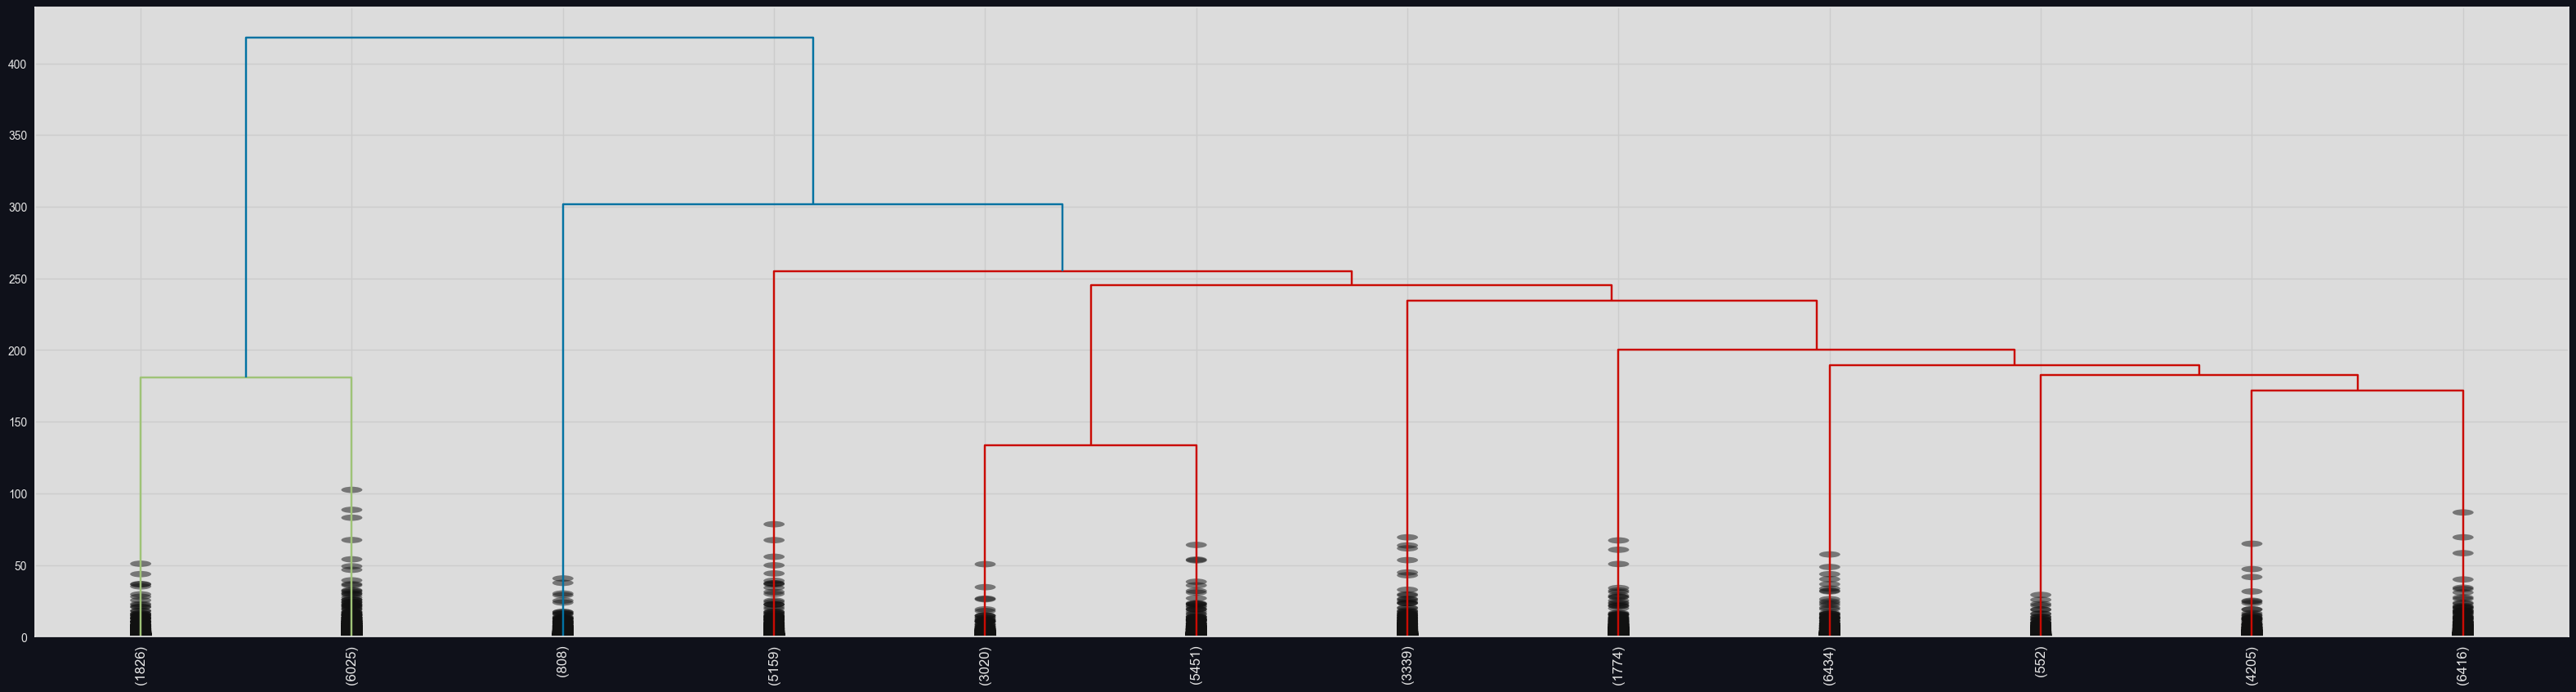

In [121]:
dend, ax = plt.subplots(1, 1, figsize=(40, 10))
dn = dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
    ax = ax
)

In [122]:
print('Distance of Last 8 Clusters from linkage array: ')
print(Z[-8:, 2].reshape(8,1))
print('Distance between last 8 Clusters: ')
print(Z[-8:, 2].reshape(8,1) - Z[-9:-1, 2].reshape(8,1))

Distance of Last 8 Clusters from linkage array: 
[[182.55049022]
 [189.4009975 ]
 [200.38413469]
 [234.28269263]
 [245.54730442]
 [254.7714858 ]
 [301.42960094]
 [418.01119422]]
Distance between last 8 Clusters: 
[[  1.80666835]
 [  6.85050727]
 [ 10.98313719]
 [ 33.89855794]
 [ 11.26461179]
 [  9.22418138]
 [ 46.65811514]
 [116.58159328]]


#### **Determining Number of Clusters**

As we can see from above, the point where the distance between clusters is the most obvious is from {301 to 418} (116.58).
We will say that our cut-off is at around 310 for better visualization.

In [123]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

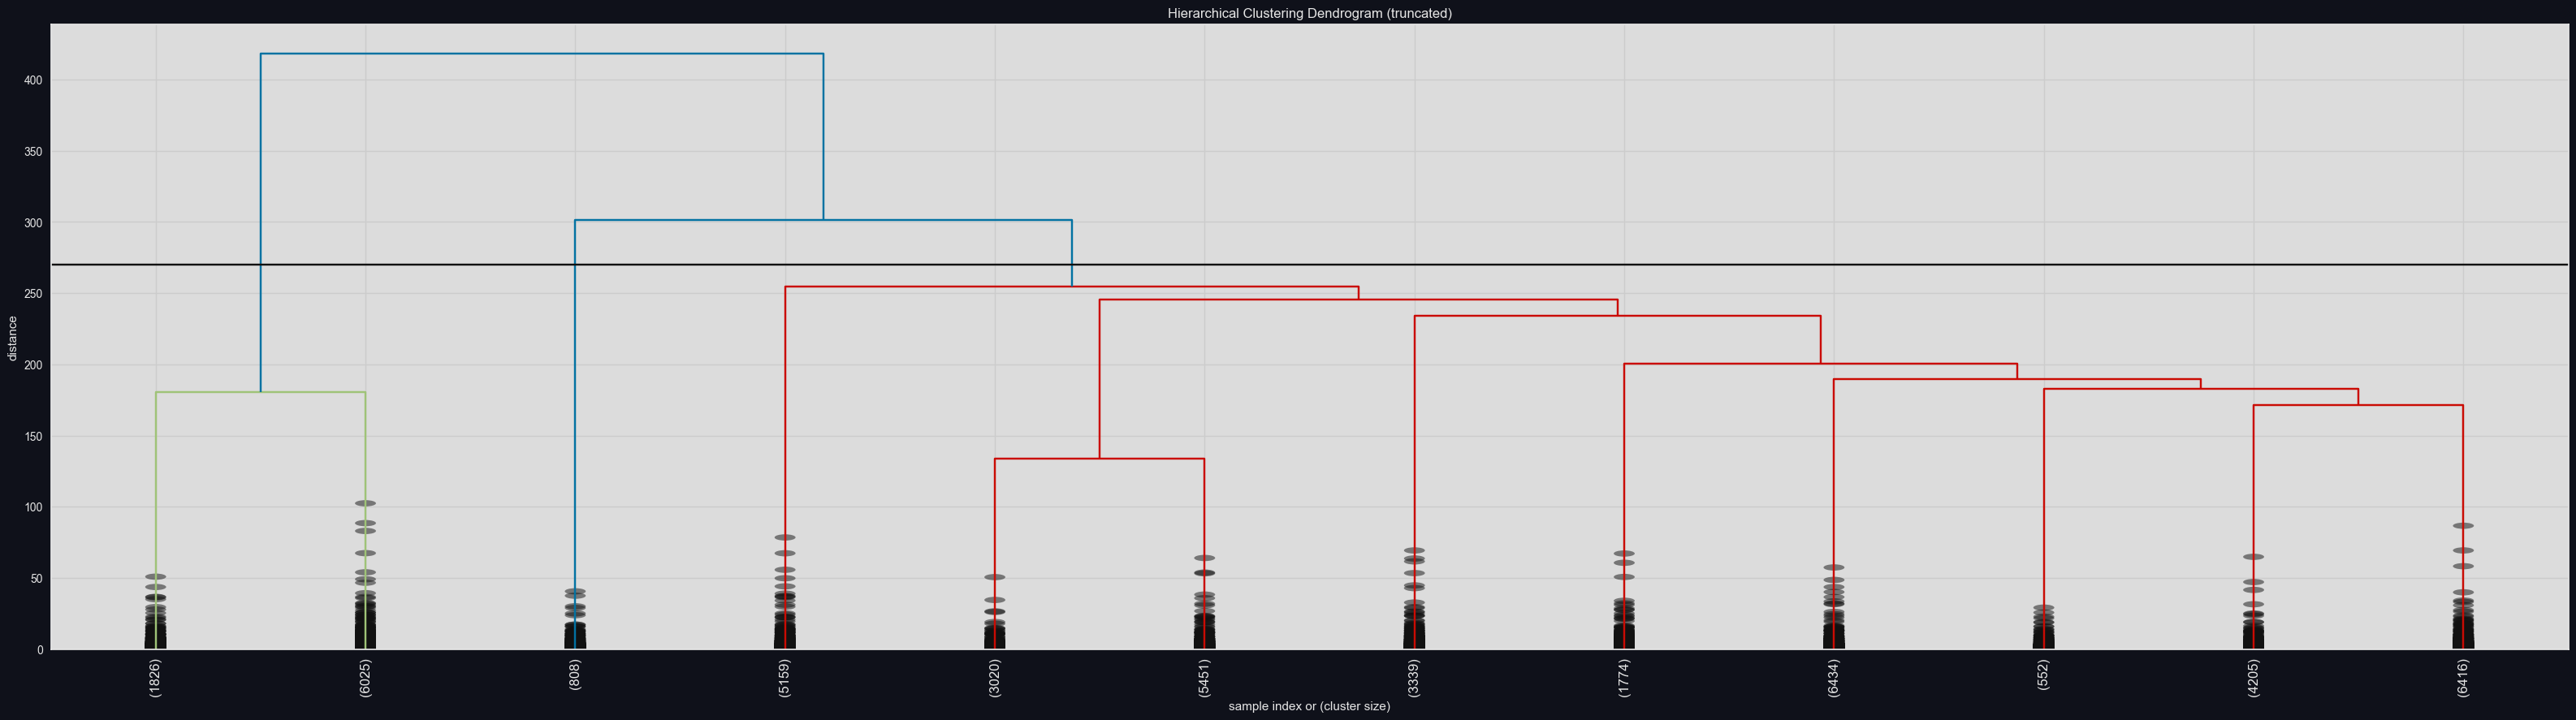

In [124]:
fdend, ax = plt.subplots(1, 1, figsize=(40, 10))
max_d = 270
fdn = fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=1000,  # useful in small plots so annotations don't overlap
    max_d=max_d,
    ax=ax
    )

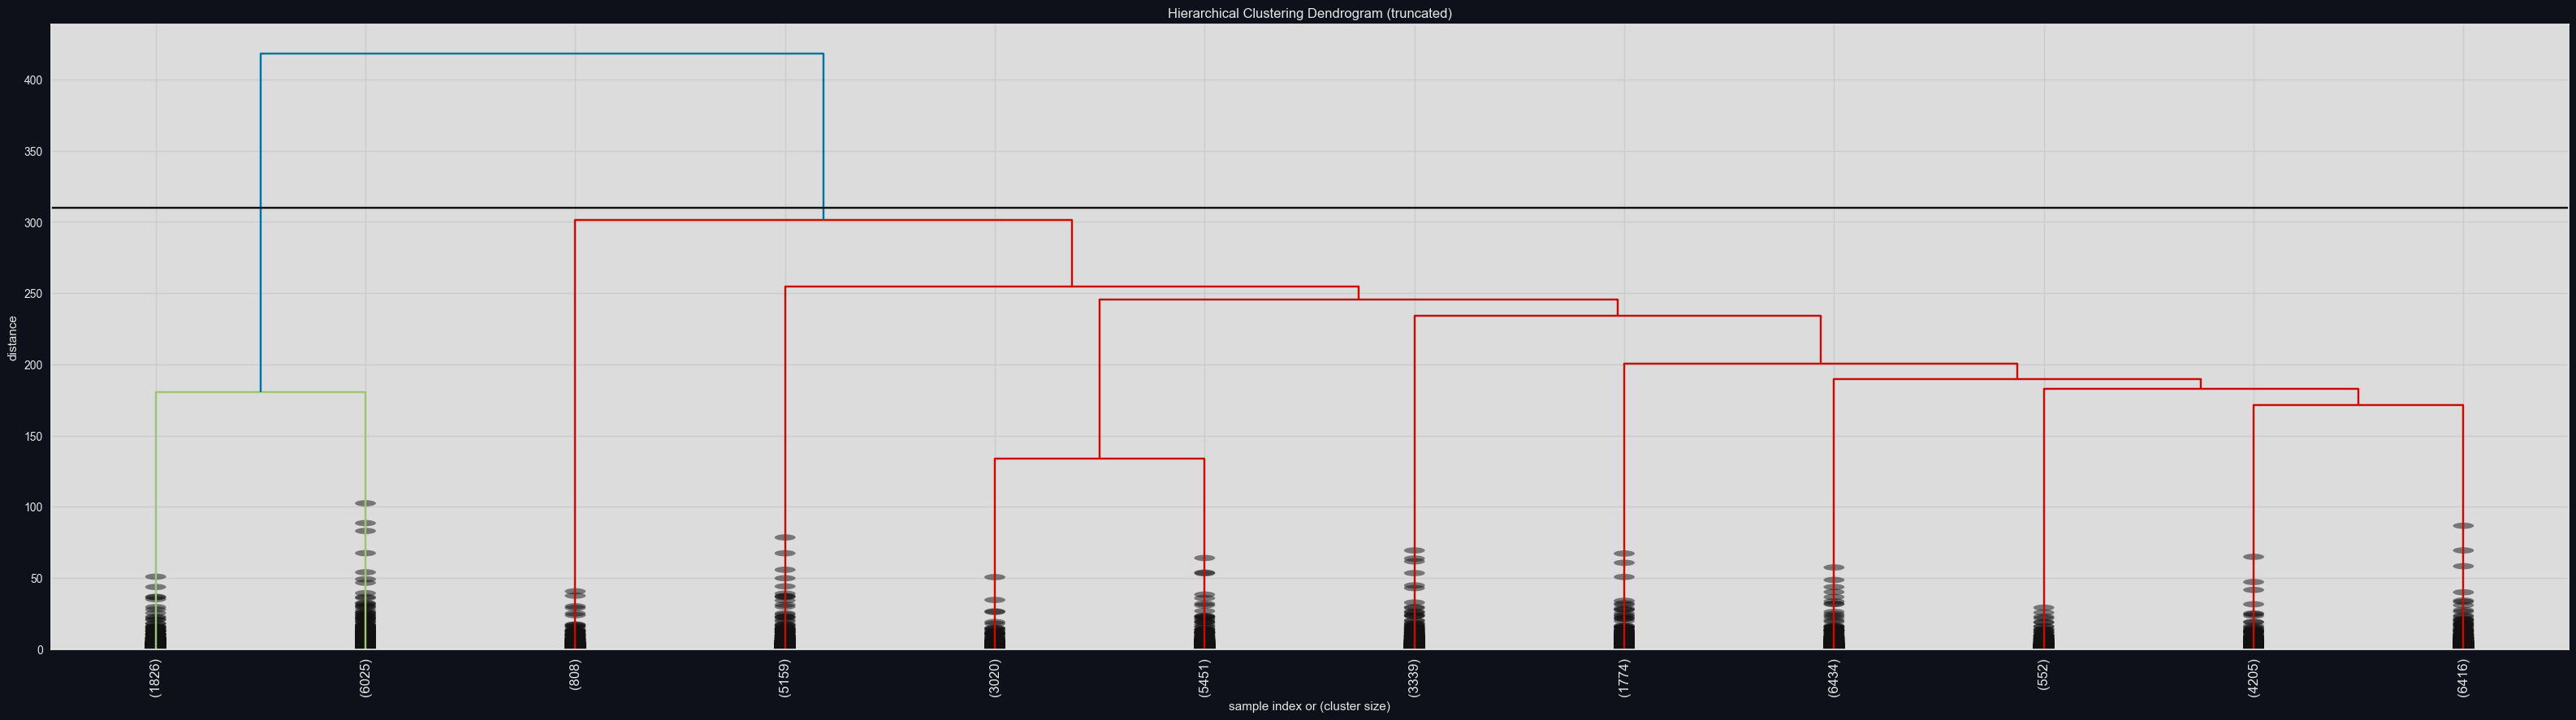

In [125]:
fdend2, ax = plt.subplots(1, 1, figsize=(40, 10))
max_d2 = 310
fdn = fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=1000,  # useful in small plots so annotations don't overlap
    max_d=max_d2,
    ax=ax
    )

As we can see from the dendrogram, there are 3 clusters.

#### **Retrieving Clusters**

Now that we know the cut-off, we will be using the function "fcluster".  
Additionally, we will try using 310 as cut-off values to see the difference.

In [ ]:
max_d = 270
max_d2 = 310
clustersFcluster = fcluster(Z, max_d, criterion='distance')
clustersFcluster2 = fcluster(Z, max_d2, criterion='distance')
print(f'Clusters (max_d = 270): {np.unique(clustersFcluster)}')
print(f'Clusters (max_d = 310): {np.unique(clustersFcluster2)}')

In [ ]:
dfV_fcluster2 = dfV_fcluster.copy()

In [ ]:
dfV_fcluster['Cluster'] = clustersFcluster
dfV_fcluster.head()

In [ ]:
dfV_fcluster2['Cluster'] = clustersFcluster2
dfV_fcluster2.head()

In [ ]:
numCol = dfV_fcluster.select_dtypes(include=np.number).columns.tolist()
cateCol = dfV_fcluster.select_dtypes(exclude=np.number).columns.tolist()
with open ('checkGroupbyCluster_cate_fcluster.txt', 'w') as f:
    for col in cateCol:
        f.write(str(dfV_fcluster[col].groupby(dfV_fcluster['Cluster']).value_counts())+'\n')
        f.write('='*50 + '\n')

In [ ]:
for c in dfV_fcluster['Cluster'].unique():
    print('Cluster ', c, 'Size: ', round(dfV_fcluster[dfV_fcluster['Cluster'] == c].shape[0]/dfV_fcluster.shape[0]*100), '%',
          '(Size: ', dfV_fcluster[dfV_fcluster['Cluster'] == c].shape[0], ')')
print(f"No. of Clusters: {len(set(clustersFcluster))}")
dfV_fcluster.groupby('Cluster').mean()

In [ ]:
for col in cateCol:
    print(dfV_fcluster.groupby(dfV_fcluster['Cluster'])[col].value_counts())
    print('='*50)

In [ ]:
violinFcluster, barFcluster, heatFcluster = clusterVisualization(dfV_fcluster, numCol, cateCol)

#### **Model Conclusion**

**All Feature that can not identify cluster's characteristics**
- age
- campaign
- job
- marital
- education
- loan
- housing

<hr>

**Cluster 1 (Contains 17 % (Size:7851) of the data) :**

- Have high number of days that have passed by after the client was last contacted from a previous campaign [pdays' mean > 200]
- Have the highest number of contacts performed before this campaign out of the 3 clusters [previous' mean > 3]
- Have never broken the terms of credit's agreement (default)
- Outcome of previous campaign are spread out with failure as the highest
- Almost all of them were contacted through phone
- More than 75% have not subscribe to the current campaign

**Characteristics of Cluster 1:**

- Most likely regular customers of the bank due to the amount of contacts performed and amount of days passed by after last contacted from a previous campaign are the highest out of all clusters

<hr>

**Cluster 2 (Contains 2 % (Size:808) of the data) :**

- Have the lowest balance out of all clusters [balance's mean < -100]
- Have the second highest number of days passed by after they were last contacted from a previous campaign [pdays' mean > 15]
- Have broken the terms of credit's agreement (default)

**Characteristics of Cluster 2:**

- Most likely problematic customers due to their balance in the bank account and they have broken the terms of credit's agreement

<hr>

**Cluster 3 (Contains 81 % (Size:36350) of the data) :**

- Have lowest number of days passed by after they were last contacted from a previous campaign [pdays' mean < 1]
- Have the lowest number of contacts performed before this campaign out of the 3 [previous' mean < 0.1]
- Have never broken the terms of credit's agreement (default)
- Almost all of the previous outcome are unknown

**Characteristics of Cluster 3:**

- Most likely normal/new customers due to amount of contacts performed and amount of days passed by after last contacted from a previous campaign are close to 0

<hr>

In [ ]:
numCol2 = dfV_fcluster2.select_dtypes(include=np.number).columns.tolist()
cateCol2 = dfV_fcluster2.select_dtypes(exclude=np.number).columns.tolist()
with open ('checkGroupbyCluster_cate_fcluster2.txt', 'w') as f:
    for col in cateCol:
        f.write(str(dfV_fcluster2[col].groupby(dfV_fcluster2['Cluster']).value_counts())+'\n')
        f.write('='*50 + '\n')

In [ ]:
for c in dfV_fcluster2['Cluster'].unique():
    print('Cluster ', c, 'Size: ', round(dfV_fcluster2[dfV_fcluster2['Cluster'] == c].shape[0]/dfV_fcluster2.shape[0]*100), '%',
          '(Size: ', dfV_fcluster2[dfV_fcluster2['Cluster'] == c].shape[0], ')')
print(f"No. of Clusters: {len(set(clustersFcluster2))}")
dfV_fcluster2.groupby('Cluster').mean()

In [ ]:
for col in cateCol:
    print(dfV_fcluster2.groupby(dfV_fcluster2['Cluster'])[col].value_counts())
    print('='*50)

In [ ]:
violinFcluster2, barFcluster2, heatFcluster2 = clusterVisualization(dfV_fcluster2, numCol2, cateCol2)

#### **Model Conclusion**

From the previous conclusion where we used 3 clusters, we can actually see that the normal/new customers were merged together with problematic customers. This happened because these 2 clusters are really close to each other.

### **Model 4: Hierarchical Clustering** (AgglomerativeClustering)
In model 3, we used fcluster to retrieve clusters. In this model, we will be using AgglomerativeClustering.

As we have seen from the previous model, having 3 clusters is better than having 2 clusters, in terms of data representation.  
So, we will be using 3 clusters in this one.

In [ ]:
dfAgglo = pd.read_csv('dfPCAForModeling.csv')
dfV_agglo = pd.read_csv('dfForVisualization.csv')

In [ ]:
n_clusters = 3
agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
aggloCluster = agglo.fit(dfAgglo)

In [ ]:
dfV_agglo['Cluster'] = agglo.labels_ + 1
dfV_agglo.head()

In [ ]:
for c in dfV_agglo['Cluster'].unique():
    print('Cluster ', c, 'Size: ', round(dfV_agglo[dfV_agglo['Cluster'] == c].shape[0]/dfV_agglo.shape[0]*100), '%', '(Size: ', dfV_agglo[dfV_agglo['Cluster'] == c].shape[0], ')')
print(f"No. of Clusters: {len(set(agglo.labels_))}")
dfV_agglo.groupby('Cluster').mean()

#### **Model Conclusion**

The function 'AgglomerativeClustering' is the same as 'fcluster' in model 3.

### **Model 5: Density-Based Spatial Clustering of Applications with Noise (DBSCAN)**

In [ ]:
dfDBSCAN1 = pd.read_csv('dfPCAForModeling.csv')
dfV_DBSCAN = pd.read_csv('dfForVisualization_LabelEncode.csv')
dfDBSCAN1.head()

We will be using Nearest Neighbors to determine the best epsilon value.

In [ ]:
neigh = NearestNeighbors(n_neighbors=10)
nbrs = neigh.fit(dfDBSCAN1)
distances, indices = nbrs.kneighbors(dfDBSCAN1)

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]

In [ ]:
DBSCAN_NN, ax = plt.subplots(1, 1, figsize=(30, 20))
ax.plot(distances)
plt.yticks(np.arange(0, 6, 0.1))
ax.plot([0, 48000], [1, 1], 'r--')
ax.plot([dfDBSCAN1.shape[0], dfDBSCAN1.shape[0]], [0, 6], 'r--')
ax.set_title('Distance of Nearest Neighbors')
ax.set_xlabel('Index')
ax.set_ylabel('Distance')

According to various sources on the internet, the best epsilon is at the knee of the curve. In this case, we will choose 1 as our epsilon.  
Furthermore, we will be using 11 as our minimum samples because we have 10 features and according to https://stats.stackexchange.com/questions/88872/a-routine-to-choose-eps-and-minpts-for-dbscan, we should use number of features + 1.

In [ ]:
db1 = DBSCAN(eps=1, min_samples=11).fit(dfDBSCAN1)
clustersDBSCAN = db1.labels_

In [ ]:
dfV_DBSCAN['Cluster'] = clustersDBSCAN
dfV_DBSCAN.to_csv('dfDBSCANClusters.csv', index=False)
dfV_DBSCAN.head()

In [ ]:
for c in dfV_DBSCAN['Cluster'].unique():
    print('Cluster ', c, 'Size: ', round(dfV_DBSCAN[dfV_DBSCAN['Cluster'] == c].shape[0]/dfV_DBSCAN.shape[0]*100), '%', '(Size: ', dfV_DBSCAN[dfV_DBSCAN['Cluster'] == c].shape[0], ')')
print(f"No. of Clusters: {len(set(clustersDBSCAN))}")
dfV_DBSCAN.groupby('Cluster').mean()

As you can see, there are a total of 59 clusters including noise cluster.

In [ ]:
violinDBSCAN, barDBSCAN, heatDBSCAN = clusterVisualization(dfV_DBSCAN, numCol, cateCol, True)

#### **Model Conclusion**

We are not really sure whether we selected our epsilon and minimum samples correctly or not. So, we can't really conclude anything from this model.

### **Conclusion**

After doing all 5 models, we can conclude them as follow:

|<center>Model</center>|Number of Clusters|<center>Overall Conclusion</center>|
|-|:-:|:-|
|K-means Clustering|4|Cluster 1 can be seen as regular customers.<br>Cluster 2 can be seen as lower-middle class normal/new customers.<br>Cluster 3 can be seen as upper-middle class normal/new customers.<br>Cluster 4 can be seen as problematic customers.|
|KPrototypes Clustering|5|Cluster 1 can be seen as normal/new customers.<br>Cluster 2 can be seen as normal/new customers with a high age.<br>Cluster 3 can be seen as regular customers with no interest in product from bank.<br>Cluster 4 can be seen as lower-middle class normal/new customers.<br>Cluster 5 can be seen as regular customers with interest in product from bank.|
|fcluster|3|Cluster 1 can be seen as regular customers.<br>Cluster 2 can be seen as problematic customers.<br>Cluster 3 can be seen as normal/new customers.|
|fcluster|2|Cluster 1 can be seen as regular customers.<br>Cluster 2 are a merge between problematic and normal/new customers.|
|Agglomerative Clustering|3|Got the same results as 3 clusters fcluster but in different clusters.|
|DBSCAN|59|We don't know what to say.|

Regarding clustering this dataset, we are not sure whether the dataset's variance is too low or just simply not suitable for clustering. Furthermore, we are not exactly sure that we did the parameters finding correctly since we have just started learning about clustering around a month ago and **<u>have not succeeded once</u>**.

In [ ]:
figToSave = [kmeansElbow, violinKmeans, barKmeans, heatKmeans, kproElbow, violinKpro, barKpro, heatKpro, dend, fdend, violinFcluster, barFcluster, heatFcluster, violinFcluster2, barFcluster2, heatFcluster2, DBSCAN_NN, violinDBSCAN, barDBSCAN, heatDBSCAN, fdend2]
figName = ['11_kmeansElbow', '12_violinKmeans', '13_barKmeans', '14_heatKmeans', '15_kproElbow', '16_violinKpro', '17_barKpro', '18_heatKpro', '19_dend', '20_fdend', '21_violinFcluster', '22_barFcluster', '23_heatFcluster', '24_violinFcluster2', '25_barFcluster2', '26_heatFcluster2', '27_DBSCAN_NN', '28_violinDBSCAN', '29_barDBSCAN', '30_heatDBSCAN', '31_fdend2']
for fig, filename, count in zip(figToSave, figName, range(len(figToSave))):
    if count < 4:
        fig.savefig(os.path.join('img', 'kmeans', filename + '.png'),
                    bbox_inches='tight')
    elif count < 8:
        fig.savefig(os.path.join('img', 'kprototype', filename + '.png'),
                    bbox_inches='tight')
    elif count < 16 or count == len(figToSave) - 1:
        fig.savefig(os.path.join('img', 'fcluster', filename + '.png'),
                    bbox_inches='tight')
    else:
        fig.savefig(os.path.join('img', 'dbscan', filename + '.png'),
                    bbox_inches='tight')